<h4>Steps for an Advance Price Prediction:</h4>

* [Overview of Dataset](#overview)
* [Data prepration](#Prep)
    - [Cheking Missing Values](#Missing)
    - [Cheking Outliers](#Outliers)
* [Exploratory Data Analysist](#exp)
* [Split dataset](#split)
* [Built Machine Learning](#modeling)
* [Best Model](#best)
* [Evaluation Model](#evaluation)
* [back]<a id="back"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings("ignore")

<a id="overview"></a>
# Overview of Dataset

In [2]:
dftr=pd.read_csv("train.csv")
dftr.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
dftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
dftr.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
dftr.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

In [6]:
dftr.size

118260

In [7]:
dftr.shape

(1460, 81)

* [Back](#back)

<a id="Prep"></a>
# Data Preparation

In [8]:
# Define possible missing values format
missing_value_format = ['N.A','NaN', 'None', 'na', 'n.a.', 'n/a', '?', '-']

# Added na_values parameter to format missing values
dftr = pd.read_csv('Train.csv', na_values=missing_value_format)
dftr.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [9]:
# See correlation betwen SalePrice columns
dftr.corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

### Column that has a correlation with SalePrice more than 0.5
- OverallQual==>      0.790982
- YearBuilt==>        0.522897
- YearRemodAdd==>     0.507101
- TotalBsmtSF==>      0.613581
- 1stFlrSF==>         0.605852
- GrLivArea==>        0.708624
- FullBath==>         0.560664
- TotRmsAbvGrd==>     0.533723
- GarageCars==>       0.640409
- GarageArea==>       0.623431

Note:
1. Correlation, the value is between 1 and -1. The closer to 1 or -1 the correlation is linear. The closer to zero, the correlation is not linear ==> very useful for finding the relationship between the column and the target, the correlation value is absolute
2. Change the data settings, by adding (NaN and None) ==> very useful for removing missing values

* [Back](#back)

<a id="Missing"></a>
# Checking Missing Values

In [10]:
dftr.isnull().values.any()

True

In [11]:
dftr.isnull().sum().sort_values()

Id                  0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
                 ... 
MasVnrType        872
Fence            1179
Alley            1369
MiscFeature      1406
PoolQC           1453
Length: 81, dtype: int64

In [12]:
# Checking missing values
print("Before imputation:")
print(dftr.isnull().sum())
print(dftr.isnull().sum().sum())

Before imputation:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
7829


In [13]:
# fill in columns have missing values with mean() function
print("\nAfter imputation:")
dftr.fillna(dftr.mean(), inplace=True)
print(dftr.isnull().sum())
print(dftr.isnull().sum().sum())


After imputation:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64
7481


In [14]:
dftr.isnull().values.any()

True

<h3>Make a Function to calculate the percent of missing data in each columns (feature) and then sort it</h3>

In [15]:
def missing_percent(dftr):
    nan_percent= 100*(dftr.isnull().sum()/len(dftr))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent
missing_percent(dftr)

Electrical       0.068493
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
FireplaceQu     47.260274
MasVnrType      59.726027
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

Note:
1. A deleted column has missing values percent higher 80%  

In [16]:
# A deleted column has missing values percent higher 80%
# A deletd row 
columns = ['Fence','Alley','MiscFeature','PoolQC']
dftr.drop(columns, inplace=True, axis=1)

# Reset index due-to deleted data
dftr.reset_index(drop=True, inplace=True)

In [17]:
missing_percent(dftr)

Electrical       0.068493
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
FireplaceQu     47.260274
MasVnrType      59.726027
dtype: float64

In [18]:
# check type data
print("kolom Electrical bertipe: ", dftr ['Electrical'].dtypes)       
print("kolom BsmtQual bertipe: ",dftr['BsmtQual'].dtypes)         
print("kolom BsmtCond bertipe: ",dftr['BsmtCond'].dtypes)    
print("kolom BsmtFinType1 bertipe: ",dftr['BsmtFinType1'].dtypes)    
print("kolom BsmtExposure bertipe: ",dftr['BsmtExposure'].dtypes)
print("kolom BsmtFinType2 bertipe: ",dftr['BsmtFinType2'].dtypes)
print("kolom GarageType bertipe: ",dftr['GarageType'].dtypes)
print("kolom GarageFinish bertipe: ",dftr['GarageFinish'].dtypes)
print("kolom GarageQual bertipe: ",dftr['GarageQual'].dtypes)
print("kolom GarageCond bertipe: ",dftr['GarageCond'].dtypes)
print("kolom FireplaceQu bertipe: ",dftr['FireplaceQu'].dtypes)
print("kolom MasVnrType bertipe: ",dftr['MasVnrType'].dtypes)

kolom Electrical bertipe:  object
kolom BsmtQual bertipe:  object
kolom BsmtCond bertipe:  object
kolom BsmtFinType1 bertipe:  object
kolom BsmtExposure bertipe:  object
kolom BsmtFinType2 bertipe:  object
kolom GarageType bertipe:  object
kolom GarageFinish bertipe:  object
kolom GarageQual bertipe:  object
kolom GarageCond bertipe:  object
kolom FireplaceQu bertipe:  object
kolom MasVnrType bertipe:  object


In [19]:
# check each column using value_counts()

print(dftr['Electrical'].value_counts())
print("\n")
print(dftr['BsmtQual'].value_counts())      
print("\n")
print(dftr['BsmtCond'].value_counts())      
print("\n")
print(dftr['BsmtFinType1'].value_counts())
print("\n")
print(dftr['BsmtExposure'].value_counts())      
print("\n")
print(dftr['BsmtFinType2'].value_counts()) 
print("\n")
print(dftr['GarageType'].value_counts())
print("\n")
print(dftr['GarageFinish'].value_counts())      
print("\n")
print(dftr['GarageQual'].value_counts())      
print("\n")
print(dftr['GarageCond'].value_counts())
print("\n")
print(dftr['FireplaceQu'].value_counts())      
print("\n")
print(dftr['MasVnrType'].value_counts())      

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64


TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


BrkFace    445
St

In [20]:
# fill in the missing values with the mean

dftr['MasVnrType'].fillna('BrkFace', inplace=True)
dftr['FireplaceQu'].fillna('Gd', inplace=True)
dftr['Electrical'].fillna('SBrkr', inplace=True)
dftr['GarageCond'].fillna('TA', inplace=True)
dftr['GarageQual'].fillna('TA', inplace=True)
dftr['GarageFinish'].fillna('Unf', inplace=True)
dftr['GarageType'].fillna('Attchd', inplace=True)
dftr['BsmtFinType2'].fillna('Unf', inplace=True)
dftr['BsmtFinType1'].fillna('Unf', inplace=True)
dftr['BsmtCond'].fillna('TA', inplace=True)
dftr['BsmtQual'].fillna('TA', inplace=True)
dftr['BsmtExposure'].fillna('No', inplace=True)

In [21]:
missing_percent(dftr)

Series([], dtype: float64)

In [22]:
dftr.isnull().values.any()

False

In [23]:
dftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

* [Back](#back)

<a id="Outliers"></a>
# Checking Outliers

How to Check Outliers
    1. using IQR ==> [used when the covariance is large]
    2. use winsorization ==> [used when covariance is small]
Treatment Outliers
1. trimming
==> this should be avoided because deleting the data will eliminate the information. However, it is possible to delete data, if the data outliers in question are indeed error outliers (due to human error, etc.).
2. winorization
==> replace data outliers with percentile values ​​in that column. This method is recommended because it does not delete data. In addition, it does not change the value much before treatment or after treatment.
==> replace the percentile with a lower or upper fence value in the data. According to the location of the outliers.

In [24]:
from scipy.stats.mstats import winsorize
import random

<code>The column that used further in this modeling is the column that has a correlation with SalePrice of more than 0.5</code>

In [25]:
dftr_corr = dftr[['OverallQual', 'YearBuilt', 'YearRemodAdd','TotalBsmtSF',
                  '1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars',
                  'GarageArea','SalePrice']]

## Column SalePrice

<b>Step 1: Checking Outliers

In [26]:
#Outer fences of the variable SalePrice
def fences(df, variable_name):    
    q1 = dftr_corr[variable_name].quantile(0.25)
    q3 = dftr_corr[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue

outer_fence_le, outer_fence_ue = fences(dftr_corr, 'SalePrice')
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

Lower end outer fence:  -122100.0
Upper end outer fence:  466075.0


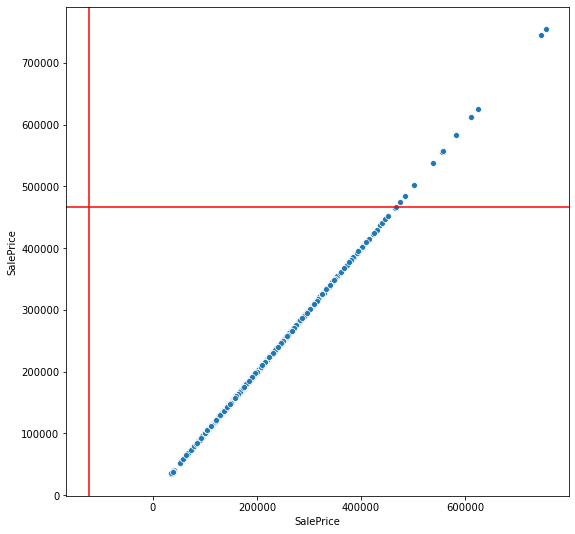

In [27]:
plt.figure(figsize=(9,9))
sns.scatterplot(x= dftr_corr['SalePrice'] , y= dftr_corr['SalePrice'] ,
                sizes = (10,200))
plt.axvline(x=-122100.0, color='r')
plt.axhline(y=466075.0, color='r')
plt.show()

In [28]:
# jumlah outliers
dftr_corr[dftr_corr['SalePrice']>466075.0]['SalePrice'].count()

12

In [29]:
# nilai dari outliers pada kolom SalePrice
dftr_corr[dftr_corr['SalePrice']>466075.0]['SalePrice']

178     501837
185     475000
440     555000
691     755000
769     538000
798     485000
803     582933
898     611657
1046    556581
1169    625000
1182    745000
1373    466500
Name: SalePrice, dtype: int64

#### Step 2: Chossing the right quantile

In [30]:
#Explore different quantiles at the upper end
print('90% quantile:   ', dftr_corr['SalePrice'].quantile(0.90))       
print('92.5% quantile: ', dftr_corr['SalePrice'].quantile(0.925))      
print('95% quantile:   ', dftr_corr['SalePrice'].quantile(0.95))       
print('97.5% quantile: ', dftr_corr['SalePrice'].quantile(0.975))      
print('99% quantile:   ', dftr_corr['SalePrice'].quantile(0.99))       
print('99.1% quantile:   ', dftr_corr['SalePrice'].quantile(0.991))       
print('99.2% quantile:   ', dftr_corr['SalePrice'].quantile(0.992))       
print('99.3% quantile:   ', dftr_corr['SalePrice'].quantile(0.993))       
print('99.4% quantile:   ', dftr_corr['SalePrice'].quantile(0.994))       
print('99.9% quantile: ', dftr_corr['SalePrice'].quantile(0.999))

90% quantile:    278000.0
92.5% quantile:  304352.7250000001
95% quantile:    326099.99999999994
97.5% quantile:  384510.7499999999
99% quantile:    442567.0100000005
99.1% quantile:    451204.7409999995
99.2% quantile:    465491.99999999994
99.3% quantile:    473189.5000000003
99.4% quantile:    489141.90200000163
99.9% quantile:  689920.00000002


- The way to choose the right quantile is to choose a quantile value that is close to the <b>lower or upper fence</b> according to the location of the outliers.
- From the data selected quantile at 99.2%.
- From the data also obtained the value of k is 100% - quantile.

#### Step 3: Count to choose quantile

In [31]:
# see the describe of the recommended quantile
# observe 99.1% and 99.2% quantile values

dftr_win = dftr_corr.copy(deep=True)

#Winsorize on right-tail
dftr_win['SalePrice_99.2%'] = winsorize(dftr_corr['SalePrice'], limits=(0, 0.0079)) # k bernilai 5%
dftr_win['SalePrice_99.3%'] = winsorize(dftr_corr['SalePrice'], limits=(0, 0.0070)) # k bernilai 7,5%
dftr_win['SalePrice_99%'] = winsorize(dftr_corr['SalePrice'], limits=(0, 0.001)) # k bernilai 7,5%
dftr_win['SalePrice_99.1%'] = winsorize(dftr_corr['SalePrice'], limits=(0, 0.009)) # k bernilai 7,5%

dftr_win[['SalePrice','SalePrice_99.2%','SalePrice_99.3%','SalePrice_99%','SalePrice_99.1%']].describe()

SalePrice  SalePrice_99.2%  SalePrice_99.3%  SalePrice_99%  \
count    1460.000000      1460.000000      1460.000000    1460.000000   
mean   180921.195890    180031.121918    180095.163014  180914.346575   
std     79442.502883     75065.721978     75313.477842   79393.389361   
min     34900.000000     34900.000000     34900.000000   34900.000000   
25%    129975.000000    129975.000000    129975.000000  129975.000000   
50%    163000.000000    163000.000000    163000.000000  163000.000000   
75%    214000.000000    214000.000000    214000.000000  214000.000000   
max    755000.000000    466500.000000    475000.000000  745000.000000   

       SalePrice_99.1%  
count      1460.000000  
mean     179902.594521  
std       74585.804195  
min       34900.000000  
25%      129975.000000  
50%      163000.000000  
75%      214000.000000  
max      451950.000000

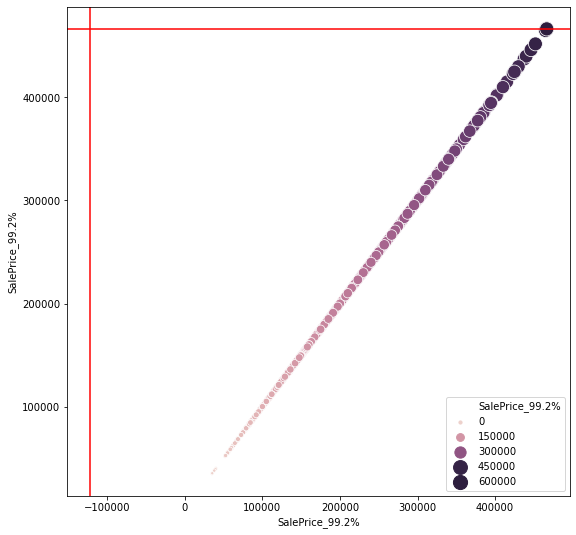

In [32]:
# Data visualization after replacing ouliers with quantile=99.2% of calculation
plt.figure(figsize=(9,9))
sns.scatterplot(x= dftr_win['SalePrice_99.2%'] , y= dftr_win['SalePrice_99.2%'] ,
                hue=dftr_win['SalePrice_99.2%'], size=dftr_win['SalePrice_99.2%'], 
                sizes = (10,200))
sns.color_palette("tab10")
plt.axvline(x=-122100.0, color='r')
plt.axhline(y=466075.0, color='r')
plt.show()

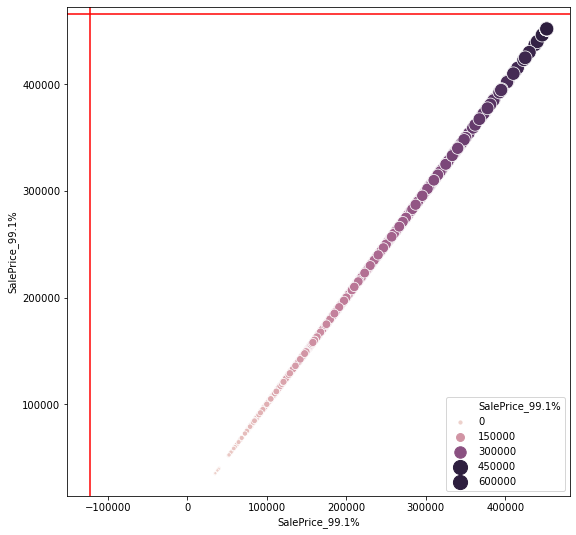

In [33]:
# Data visualization after replacing ouliers with quantile=99.1% of calculation
plt.figure(figsize=(9,9))
sns.scatterplot(x= dftr_win['SalePrice_99.1%'] , y= dftr_win['SalePrice_99.1%'] ,
                hue=dftr_win['SalePrice_99.1%'], size=dftr_win['SalePrice_99.1%'], 
                sizes = (10,200))
sns.color_palette("tab10")
plt.axvline(x=-122100.0, color='r')
plt.axhline(y=466075.0, color='r')
plt.show()

<code>Note: The selected quantile is 99.1% because, in that quantile there are no outliers<code>

#### Step 4: Choose quantile

In [34]:
#Quantile selected in the range of 99.1%
#Data that has been treated with outliers is entered in the DataFrame dftr_win
#Removed SalePrice column other than SalePrice_99.1% on dftr_win
dftr_win.drop(['SalePrice_99.2%','SalePrice_99.3%','SalePrice_99%'], axis=1, inplace=True)

# Reset index due to deleted data
dftr_win.reset_index(drop=True, inplace=True)

In [35]:
# Check outer fence 
Q1 = dftr_win['SalePrice_99.1%'].quantile(0.25)
Q3 = dftr_win['SalePrice_99.1%'].quantile(0.75)
IQR = Q3 - Q1
print("IQR: ", IQR)
outer_fence_ue = Q3 + 3 * IQR
outer_fence_le = Q1 - 3 * IQR
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

IQR:  84025.0
Lower end outer fence:  -122100.0
Upper end outer fence:  466075.0


In [36]:
# Count outliers
dftr_win[dftr_win['OverallQual']>466075.0]['SalePrice'].count()

0

Notes:
    - SalePrice column no longer has outliers
    - Treatment of SalePrice column outliers using the winorization method
    - SalePrice column is no longer valid, replaced with SalePrice_99.1% column

## Column OverallQual 

<b>Step 1: Checking Outliers

In [37]:
#Outer fences of the variable OverallQual
def fences(df, variable_name):    
    q1 = dftr_corr[variable_name].quantile(0.25)
    q3 = dftr_corr[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue

outer_fence_le, outer_fence_ue = fences(dftr_win, 'OverallQual')
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

Lower end outer fence:  -1.0
Upper end outer fence:  13.0


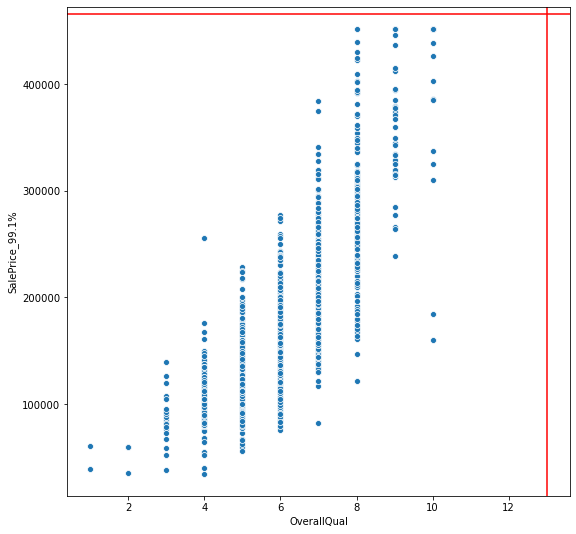

In [38]:
#dataframe used comes from a dataframe that has been wonorized in the SalePrice column, namely the dftr_win dataframe
#horizontal line shows the value of the outer fence in the SalePrice_91% column
#vertical line shows the value of the outer fence in the OverallQual column
plt.figure(figsize=(9,9))
sns.scatterplot(x= dftr_win['OverallQual'] , y= dftr_win['SalePrice_99.1%'] ,
                sizes = (10,200))
plt.axvline(x=13, color='r')
plt.axhline(y=466075.0, color='r')
plt.show()

Notes:
    - OverallQual column no longer has outliers

## Column YearBuilt

<b>Step 1: Checking Outliers

In [39]:
#Outer fences of the variable YearBuilt
def fences(df, variable_name):    
    q1 = dftr[variable_name].quantile(0.25)
    q3 = dftr[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue

outer_fence_le, outer_fence_ue = fences(dftr_win, 'YearBuilt')
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

Lower end outer fence:  1816.0
Upper end outer fence:  2138.0


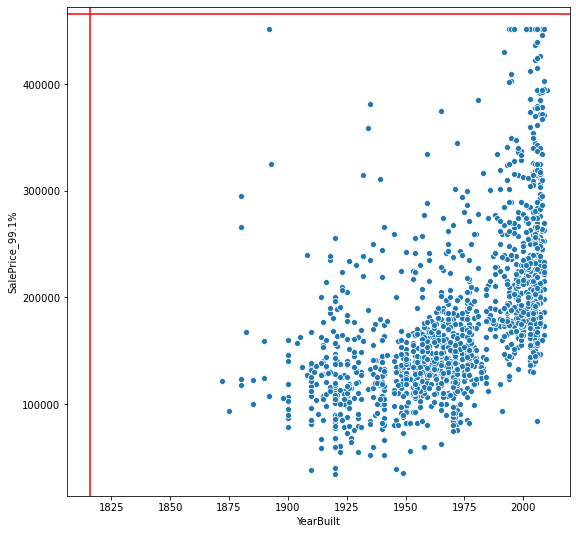

In [40]:
#SalePrice_91% graph with YearBuilt
#horizontal line is the value of Upper Outer Fence SalePrice_91%
#vertical line is Lower Outer Fence YearBuilt
# the dataframe used is dftr_win
plt.figure(figsize=(9,9))
sns.scatterplot(x= dftr_win['YearBuilt'] , y= dftr_win['SalePrice_99.1%'] ,
                sizes = (10,200))
plt.axvline(x=1816, color='r')
plt.axhline(y=466075.0, color='r')
plt.show()

Notes:
    - YearBuilt column no longer has outliers

## Column YearRemodAdd

<b>Step 1: Checking Outliers

In [41]:
#Outer fences of the variable YearBuilt
def fences(df, variable_name):    
    q1 = dftr[variable_name].quantile(0.25)
    q3 = dftr[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue

outer_fence_le, outer_fence_ue = fences(dftr_win, 'YearRemodAdd')
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

Lower end outer fence:  1856.0
Upper end outer fence:  2115.0


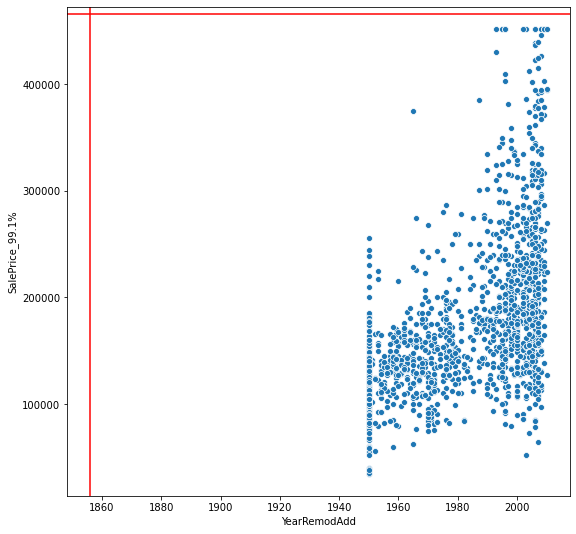

In [42]:
#SalePrice_91% graph with YearRemodAdd
#horizontal line is the value of Upper Outer Fence SalePrice_91%
#vertical line is Lower Outer Fence YearBuilt
# the dataframe used is dftr_win
plt.figure(figsize=(9,9))
sns.scatterplot(x= dftr_win['YearRemodAdd'] , y= dftr_win['SalePrice_99.1%'] ,
                sizes = (10,200))
plt.axvline(x=1856, color='r')
plt.axhline(y=466075.0, color='r')
plt.show()

Notes:
    - YearRemodAdd column no longer has outliers

## Column TotalBsmtSF

<b>Step 1: Checking Outliers

In [43]:
#Outer fences of the variable YearBuilt
def fences(df, variable_name):    
    q1 = dftr[variable_name].quantile(0.25)
    q3 = dftr[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue

outer_fence_le, outer_fence_ue = fences(dftr_win, 'TotalBsmtSF')
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

Lower end outer fence:  -711.75
Upper end outer fence:  2805.75


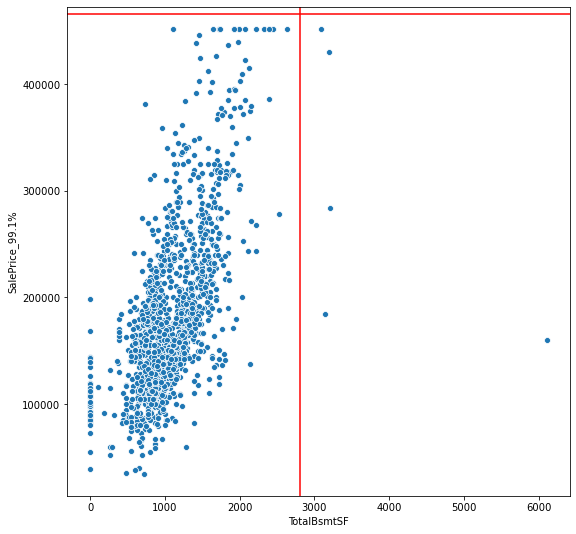

In [44]:
#SalePrice_91% graph with TotalBsmtSF
#horizontal line is the value of Upper Outer Fence SalePrice_91%
#vertical line is the Upper Outer Fence TotalBsmtSF
# the dataframe used is dftr_win
plt.figure(figsize=(9,9))
sns.scatterplot(x= dftr_win['TotalBsmtSF'] , y= dftr_win['SalePrice_99.1%'] ,
                sizes = (10,200))
plt.axvline(x=2805, color='r')
plt.axhline(y=466075.0, color='r')
plt.show()

In [45]:
# Count outliers
dftr_win[dftr_win['TotalBsmtSF']>2805][['TotalBsmtSF','SalePrice_99.1%']]

TotalBsmtSF  SalePrice_99.1%
332          3206           284000
440          3094           451950
496          3200           430000
523          3138           184750
1298         6110           160000

#### Step 2: memilih quantile yang tepat

In [46]:
#Explore different quantiles at the upper end
print('99.1% quantile:   ', dftr_win['TotalBsmtSF'].quantile(0.991))       
print('99.2% quantile:   ', dftr_win['TotalBsmtSF'].quantile(0.992))       
print('99.3% quantile:   ', dftr_win['TotalBsmtSF'].quantile(0.993))       
print('99.4% quantile:   ', dftr_win['TotalBsmtSF'].quantile(0.994))       
print('99.5% quantile: ', dftr_win['TotalBsmtSF'].quantile(0.995))
print('99.6% quantile:   ', dftr_win['TotalBsmtSF'].quantile(0.996))       
print('99.7% quantile: ', dftr_win['TotalBsmtSF'].quantile(0.997))      
print('99.8% quantile:   ', dftr_win['TotalBsmtSF'].quantile(0.998))       
print('99.9% quantile: ', dftr_win['TotalBsmtSF'].quantile(0.999))      

99.1% quantile:    2208.401999999995
99.2% quantile:    2218.968
99.3% quantile:    2307.2090000000035
99.4% quantile:    2392.9840000000004
99.5% quantile:  2429.8399999999965
99.6% quantile:    2541.8759999999984
99.7% quantile:  2920.203000000022
99.8% quantile:    3143.0840000000067
99.9% quantile:  3203.246000000001


- The way to choose the right quantile is to choose a quantile value that is close to <b>lower or upper fence.</b> According to the location of the outliers.
- From the data selected quantile at 99.2%.
- From the data also obtained the value of k is 100% - quantile.

#### Step 3: Count to choose quantile

In [47]:
(100-99.7)/100

0.0029999999999999714

In [48]:
# see the describe of the recommended quantile
# observe 99.6% and 99.7% quantile values

#Winsorize on right-tail
dftr_win['TotalBsmtSF_99.6%'] = winsorize(dftr_win['TotalBsmtSF'], limits=(0, 0.004)) # k bernilai 4%
dftr_win['TotalBsmtSF_99.7%'] = winsorize(dftr_win['TotalBsmtSF'], limits=(0, 0.003)) # k bernilai 3%

dftr_win[['TotalBsmtSF','TotalBsmtSF_99.6%','TotalBsmtSF_99.7%']].describe()

TotalBsmtSF  TotalBsmtSF_99.6%  TotalBsmtSF_99.7%
count  1460.000000        1460.000000        1460.000000
mean   1057.429452        1053.605479        1055.184247
std     438.705324         413.929433         420.777616
min       0.000000           0.000000           0.000000
25%     795.750000         795.750000         795.750000
50%     991.500000         991.500000         991.500000
75%    1298.250000        1298.250000        1298.250000
max    6110.000000        2633.000000        3094.000000

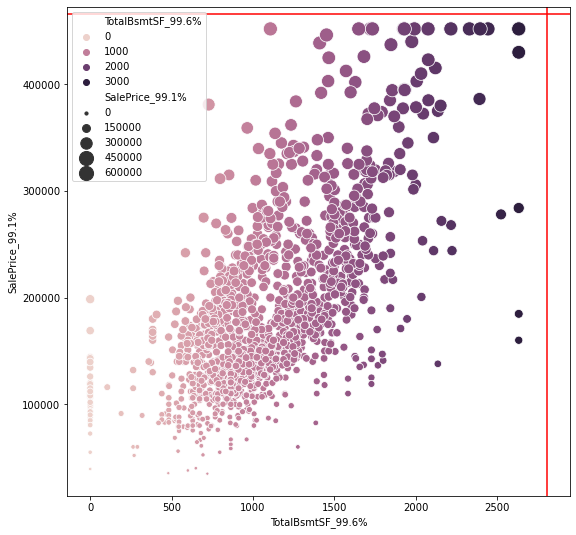

In [49]:
# Data visualization after replacing ouliers with quantile=99.6% of calculation
plt.figure(figsize=(9,9))
sns.scatterplot(x= dftr_win['TotalBsmtSF_99.6%'] , y= dftr_win['SalePrice_99.1%'] ,
                hue=dftr_win['TotalBsmtSF_99.6%'], size=dftr_win['SalePrice_99.1%'], 
                sizes = (10,200))
sns.color_palette("tab10")
plt.axvline(x=2805, color='r')
plt.axhline(y=466075.0, color='r')
plt.show()

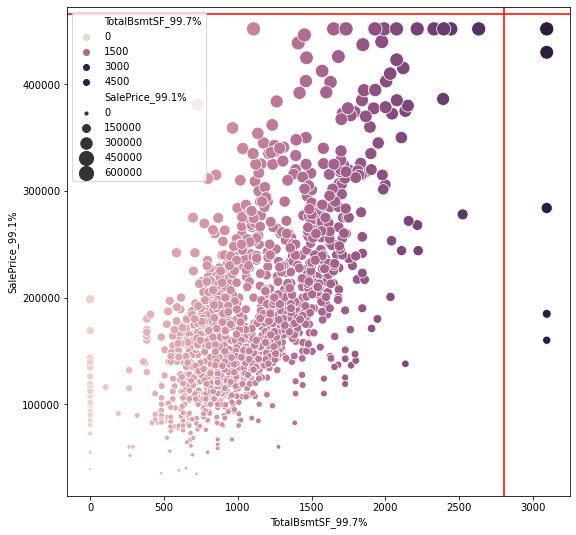

In [50]:
# Data visualization after replacing ouliers with quantile=99.7% of calculation
plt.figure(figsize=(9,9))
sns.scatterplot(x= dftr_win['TotalBsmtSF_99.7%'] , y= dftr_win['SalePrice_99.1%'] ,
                hue=dftr_win['TotalBsmtSF_99.7%'], size=dftr_win['SalePrice_99.1%'], 
                sizes = (10,200))
sns.color_palette("tab10")
plt.axvline(x=2805, color='r')
plt.axhline(y=466075.0, color='r')
plt.show()

<code>Note: The selected quantile is 99.6% because, in that quantile there are no outliers<code>

#### Step 4: Chose quantile

In [51]:
#Quantile selected in the range of 99.6%
#Data that has been treated with outliers is entered in the DataFrame dftr_win
#Removed TotalBsmtSF_99.7% column on dftr_win
dftr_win.drop('TotalBsmtSF_99.7%', axis=1, inplace=True)

# Reset index due to deleted data
dftr_win.reset_index(drop=True, inplace=True)

In [52]:
# Visualization with scatter plot after winorization
Q1 = dftr_win['TotalBsmtSF_99.6%'].quantile(0.25)
Q3 = dftr_win['TotalBsmtSF_99.6%'].quantile(0.75)
IQR = Q3 - Q1
print("IQR: ", IQR)
outer_fence_ue = Q3 + 3 * IQR
outer_fence_le = Q1 - 3 * IQR
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

IQR:  502.5
Lower end outer fence:  -711.75
Upper end outer fence:  2805.75


In [53]:
# Count outliers
dftr_win[dftr_win['TotalBsmtSF_99.6%']>2805]['SalePrice'].count()

0

Notes:
    - TotalBsmtSF column has no outliers
    - Treatment of TotalBsmtSF column outliers using the winorization method
    - TotalBsmtSF column is no longer valid, replaced with TotalBsmtSF_99.6% column

## Column 1stFlrSF

<b>Step 1: Checking Outliers

In [54]:
#Outer fences of the variable YearBuilt
def fences(df, variable_name):    
    q1 = dftr[variable_name].quantile(0.25)
    q3 = dftr[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue

outer_fence_le, outer_fence_ue = fences(dftr_win, '1stFlrSF')
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

Lower end outer fence:  -645.75
Upper end outer fence:  2919.0


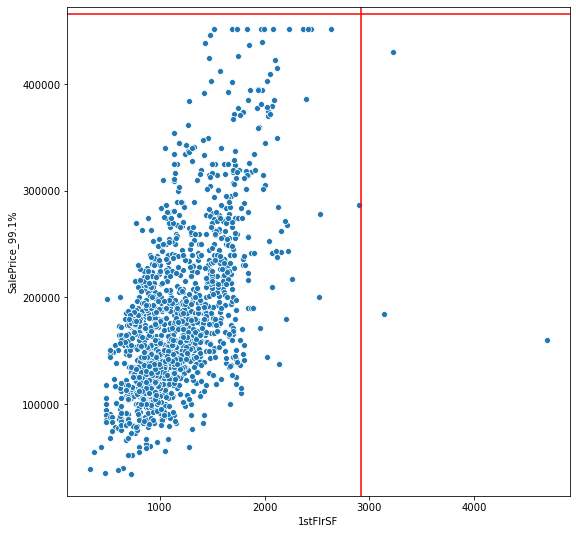

In [55]:
#grafik SalePrice_91% dengan YearRemodAdd
#garis horizontal merupakan nilai Upper Outer Fence SalePrice_91%
#garis vertikal merupakan Upper Outer Fence 1stFlrSF
# dataframe yang digunakan adalah dftr_win
plt.figure(figsize=(9,9))
sns.scatterplot(x= dftr_win['1stFlrSF'] , y= dftr_win['SalePrice_99.1%'] ,
                sizes = (10,200))
plt.axvline(x=2919, color='r')
plt.axhline(y=466075.0, color='r')
plt.show()

In [56]:
# Count outliers
dftr_win[dftr_win['1stFlrSF']>=2919][['1stFlrSF','SalePrice_99.1%']]

1stFlrSF  SalePrice_99.1%
496       3228           430000
523       3138           184750
1298      4692           160000

#### Step 2: choose the right quantity

In [57]:
#Explore different quantiles at the upper end
print('99.1% quantile:   ', dftr_win['1stFlrSF'].quantile(0.991))       
print('99.2% quantile:   ', dftr_win['1stFlrSF'].quantile(0.992))       
print('99.3% quantile:   ', dftr_win['1stFlrSF'].quantile(0.993))       
print('99.4% quantile:   ', dftr_win['1stFlrSF'].quantile(0.994))       
print('99.5% quantile: ', dftr_win['1stFlrSF'].quantile(0.995))
print('99.6% quantile:   ', dftr_win['1stFlrSF'].quantile(0.996))       
print('99.7% quantile: ', dftr_win['1stFlrSF'].quantile(0.997))      
print('99.8% quantile:   ', dftr_win['1stFlrSF'].quantile(0.998))       
print('99.9% quantile: ', dftr_win['1stFlrSF'].quantile(0.999))      

99.1% quantile:    2232.5589999999993
99.2% quantile:    2293.4399999999973
99.3% quantile:    2386.036000000001
99.4% quantile:    2404.214000000001
99.5% quantile:  2434.2649999999976
99.6% quantile:    2516.4759999999997
99.7% quantile:  2591.907000000005
99.8% quantile:    2917.6800000000258
99.9% quantile:  3186.690000000015


- The way to choose the right quantile is to choose a quantile value that is close to <b>lower or upper fence.</b> According to the location of the outliers
- From the data selected quantile at 99.7% and quantile 99.8%
- From the data also obtained the value of k is 100% - quantile

#### Step 3: menghitung untuk memilih quantile 

In [58]:
# see the describe of the recommended quantile
# observe 99.7% and 99.8% quantile values

#Winsorize on right-tail
dftr_win['1stFlrSF_99.7%'] = winsorize(dftr_win['1stFlrSF'], limits=(0, 0.003)) # k bernilai 4%
dftr_win['1stFlrSF_99.8%'] = winsorize(dftr_win['1stFlrSF'], limits=(0, 0.002)) # k bernilai 3%

dftr_win[['1stFlrSF','1stFlrSF_99.7%','1stFlrSF_99.8%']].describe()

1stFlrSF  1stFlrSF_99.7%  1stFlrSF_99.8%
count  1460.000000     1460.000000     1460.000000
mean   1162.626712     1160.281507     1161.500685
std     386.587738      373.057467      378.597907
min     334.000000      334.000000      334.000000
25%     882.000000      882.000000      882.000000
50%    1087.000000     1087.000000     1087.000000
75%    1391.250000     1391.250000     1391.250000
max    4692.000000     2633.000000     3138.000000

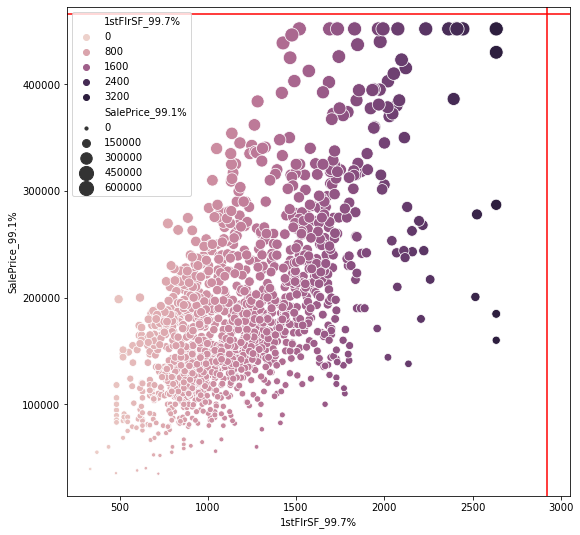

In [59]:
# Visualization of data after replacing ouliers with quantile=99.7% of calculation
plt.figure(figsize=(9,9))
sns.scatterplot(x= dftr_win['1stFlrSF_99.7%'] , y= dftr_win['SalePrice_99.1%'] ,
                hue=dftr_win['1stFlrSF_99.7%'], size=dftr_win['SalePrice_99.1%'], 
                sizes = (10,200))
sns.color_palette("tab10")
plt.axvline(x=2919, color='r')
plt.axhline(y=466075.0, color='r')
plt.show()

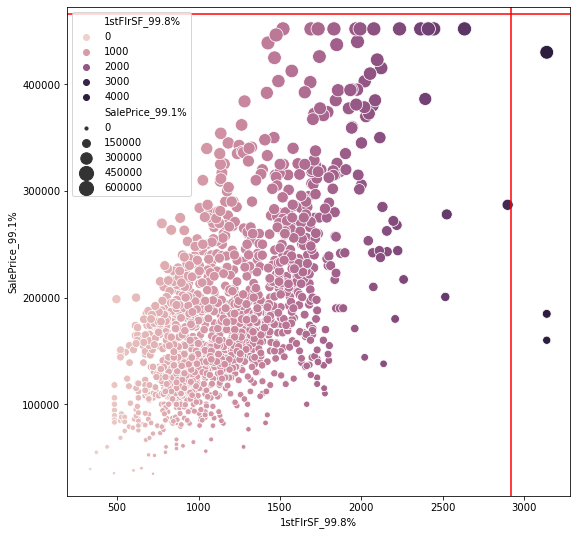

In [60]:
# Data visualization after replacing ouliers with quantile=99.8% of calculation
plt.figure(figsize=(9,9))
sns.scatterplot(x= dftr_win['1stFlrSF_99.8%'] , y= dftr_win['SalePrice_99.1%'] ,
                hue=dftr_win['1stFlrSF_99.8%'], size=dftr_win['SalePrice_99.1%'], 
                sizes = (10,200))
sns.color_palette("tab10")
plt.axvline(x=2919, color='r')
plt.axhline(y=466075.0, color='r')
plt.show()

<code>Note: The selected quantile is 99.7% because, in that quantile there are no outliers<code>

#### Step 4: Chose quantile

In [61]:
#Quantile selected in the range of 99.7%
#Data that has been treated with outliers is entered in the DataFrame dftr_win
#Removed column 1stFlrSF_99.8% on dftr_win
dftr_win.drop('1stFlrSF_99.8%', axis=1, inplace=True)

# Reset index due to deleted data
dftr_win.reset_index(drop=True, inplace=True)

In [62]:
# Visualization with scatter plot after winorization
Q1 = dftr_win['1stFlrSF_99.7%'].quantile(0.25)
Q3 = dftr_win['1stFlrSF_99.7%'].quantile(0.75)
IQR = Q3 - Q1
print("IQR: ", IQR)
outer_fence_ue = Q3 + 3 * IQR
outer_fence_le = Q1 - 3 * IQR
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

IQR:  509.25
Lower end outer fence:  -645.75
Upper end outer fence:  2919.0


In [63]:
# Count outliers
dftr_win[dftr_win['1stFlrSF_99.7%']>=2919]['SalePrice'].count()

0

Notes:
    - column 1stFlrSF no longer has outliers
    - treatment of 1stFlrSF column outliers using the winorization method
    - column 1stFlrSF is deprecated replaced with column 1stFlrSF_99.7%

# Column GrLivArea	

<b>Step 1: Checking Outliers

In [64]:
#Outer fences of the variable YearBuilt
def fences(df, variable_name):    
    q1 = dftr_win[variable_name].quantile(0.25)
    q3 = dftr_win[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue

outer_fence_le, outer_fence_ue = fences(dftr_win, 'GrLivArea')
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

Lower end outer fence:  -812.25
Upper end outer fence:  3718.5


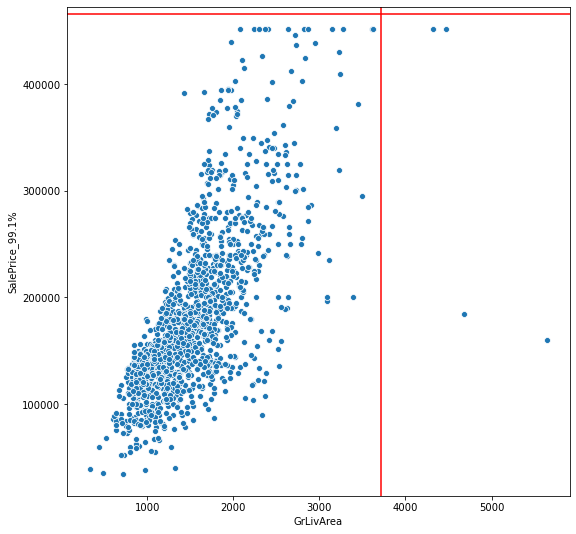

In [65]:
#SalePrice_91% graph with GrLivArea
#horizontal line is the value of Upper Outer Fence SalePrice_91%
#vertical line is the Upper Outer Fence GrLivArea
# the dataframe used is dftr_win
plt.figure(figsize=(9,9))
sns.scatterplot(x= dftr_win['GrLivArea'] , y= dftr_win['SalePrice_99.1%'] ,
                sizes = (10,200))
plt.axvline(x=3719, color='r')
plt.axhline(y=466075.0, color='r')
plt.show()

In [66]:
# Count outliers
dftr_win[dftr_win['GrLivArea']>=3719][['GrLivArea','SalePrice_99.1%']]

GrLivArea  SalePrice_99.1%
523        4676           184750
691        4316           451950
1182       4476           451950
1298       5642           160000

#### Step 2: Chossing the right quantile

In [67]:
#Explore different quantiles at the upper end
print('99.1% quantile:   ', dftr_win['GrLivArea'].quantile(0.991))       
print('99.2% quantile:   ', dftr_win['GrLivArea'].quantile(0.992))       
print('99.3% quantile:   ', dftr_win['GrLivArea'].quantile(0.993))       
print('99.4% quantile:   ', dftr_win['GrLivArea'].quantile(0.994))       
print('99.5% quantile: ', dftr_win['GrLivArea'].quantile(0.995))
print('99.6% quantile:   ', dftr_win['GrLivArea'].quantile(0.996))       
print('99.7% quantile: ', dftr_win['GrLivArea'].quantile(0.997))      
print('99.8% quantile:   ', dftr_win['GrLivArea'].quantile(0.998))       
print('99.9% quantile: ', dftr_win['GrLivArea'].quantile(0.999))      

99.1% quantile:    3186.9259999999954
99.2% quantile:    3223.968
99.3% quantile:    3235.8700000000003
99.4% quantile:    3307.536000000011
99.5% quantile:  3431.659999999996
99.6% quantile:    3511.8599999999988
99.7% quantile:  3619.837000000001
99.8% quantile:    4329.120000000017
99.9% quantile:  4584.2000000000335


- The way to choose the right quantile is to choose a quantile value that is close to <b>lower or upper fence.</b> According to the location of the outliers
- From the data selected quantile at 99.7% and quantile 99.8%
- From the data also obtained the value of k is 100% - quantile

#### Step 3: count to choose quantile 

In [68]:
# see the describe of the recommended quantile
# observe 99.7% and 99.8% quantile values

#Winsorize on right-tail
dftr_win['GrLivArea_99.7%'] = winsorize(dftr_win['GrLivArea'], limits=(0, 0.003)) # k bernilai 3%
dftr_win['GrLivArea_99.8%'] = winsorize(dftr_win['GrLivArea'], limits=(0, 0.002)) # k bernilai 2%

dftr_win[['GrLivArea','GrLivArea_99.7%','GrLivArea_99.8%']].describe()

GrLivArea  GrLivArea_99.7%  GrLivArea_99.8%
count  1460.000000      1460.000000      1460.000000
mean   1515.463699      1512.311644      1514.528082
std     525.480383       508.372601       519.255092
min     334.000000       334.000000       334.000000
25%    1129.500000      1129.500000      1129.500000
50%    1464.000000      1464.000000      1464.000000
75%    1776.750000      1776.750000      1776.750000
max    5642.000000      3627.000000      4476.000000

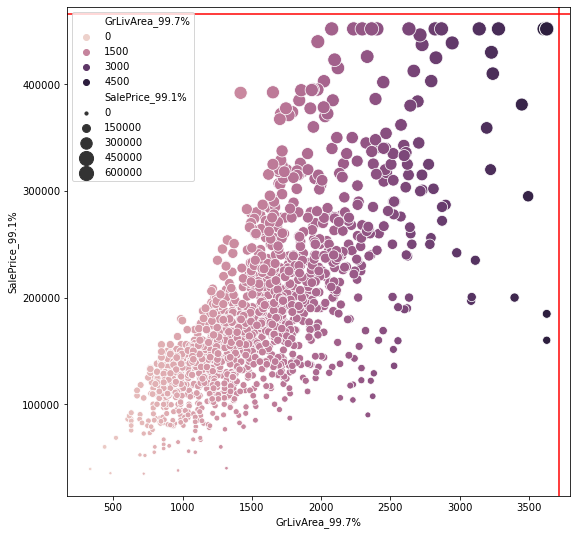

In [69]:
# Visualization of data after replacing ouliers with quantile=99.7% of calculation
plt.figure(figsize=(9,9))
sns.scatterplot(x= dftr_win['GrLivArea_99.7%'] , y= dftr_win['SalePrice_99.1%'] ,
                hue=dftr_win['GrLivArea_99.7%'], size=dftr_win['SalePrice_99.1%'], 
                sizes = (10,200))
sns.color_palette("tab10")
plt.axvline(x=3719, color='r')
plt.axhline(y=466075.0, color='r')
plt.show()

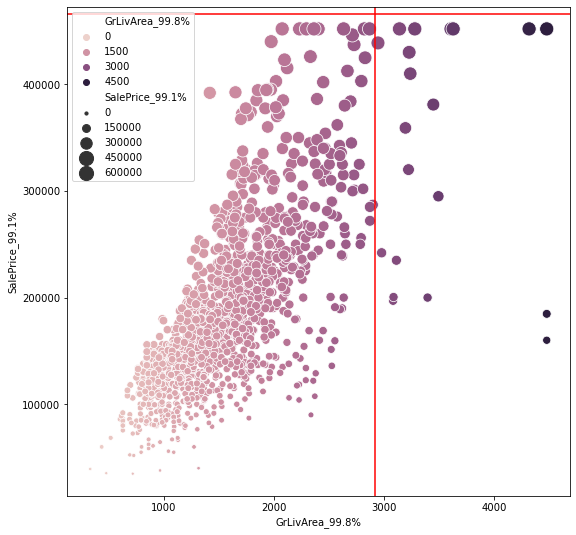

In [70]:
# Data visualization after replacing ouliers with quantile=99.8% of calculation
plt.figure(figsize=(9,9))
sns.scatterplot(x= dftr_win['GrLivArea_99.8%'] , y= dftr_win['SalePrice_99.1%'] ,
                hue=dftr_win['GrLivArea_99.8%'], size=dftr_win['SalePrice_99.1%'], 
                sizes = (10,200))
sns.color_palette("tab10")
plt.axvline(x=2919, color='r')
plt.axhline(y=466075.0, color='r')
plt.show()

<code>Note: The selected quantile is 99.7% because, in that quantile there are no outliers<code>

#### Step 4: Memilih quantile

In [71]:
#Quantile selected in the range of 99.8%
#Data that has been treated with outliers is entered in the DataFrame dftr_win
#Removed GrLivArea_99.8% column on dftr_win
dftr_win.drop('GrLivArea_99.8%', axis=1, inplace=True)

# Reset index due to deleted data
dftr_win.reset_index(drop=True, inplace=True)

In [72]:
# Visualization with scatter plot after winorization
Q1 = dftr_win['GrLivArea_99.7%'].quantile(0.25)
Q3 = dftr_win['GrLivArea_99.7%'].quantile(0.75)
IQR = Q3 - Q1
print("IQR: ", IQR)
outer_fence_ue = Q3 + 3 * IQR
outer_fence_le = Q1 - 3 * IQR
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

IQR:  647.25
Lower end outer fence:  -812.25
Upper end outer fence:  3718.5


In [73]:
# Count outliers
dftr_win[dftr_win['GrLivArea_99.7%']>=3719]['SalePrice'].count()

0

Notes:
    - GrLivArea column no longer has outliers
    - treatment of GrLivArea column outliers using the winorization method
    - GrLivArea column is no longer valid, replaced with GrLivArea_99.7% column

# Columns FullBath

<b>Step 1: Checking Outliers

In [74]:
#Outer fences of the variable YearBuilt
def fences(df, variable_name):    
    q1 = dftr_win[variable_name].quantile(0.25)
    q3 = dftr_win[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue

outer_fence_le, outer_fence_ue = fences(dftr_win, 'FullBath')
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

Lower end outer fence:  -2.0
Upper end outer fence:  5.0


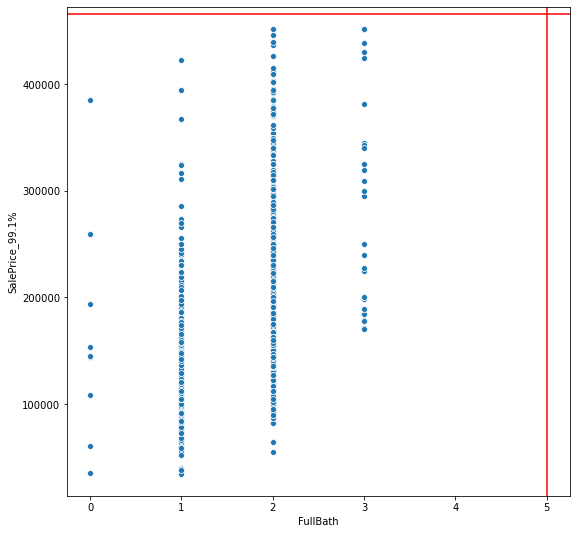

In [75]:
#SalePrice_91% graph with FullBath
#horizontal line is the value of Upper Outer Fence SalePrice_91%
#vertical line is Upper Outer Fence FullBath
#the dataframe used is dftr_win
plt.figure(figsize=(9,9))
sns.scatterplot(x= dftr_win['FullBath'] , y= dftr_win['SalePrice_99.1%'] ,
                sizes = (10,200))
plt.axvline(x=5, color='r')
plt.axhline(y=466075.0, color='r')
plt.show()

In [76]:
# Count outliers
dftr_win[dftr_win['FullBath']>=5][['FullBath','SalePrice_99.1%']].count()

FullBath           0
SalePrice_99.1%    0
dtype: int64

Notes:
    - FullBath column no longer has outliers

# TotRmsAbvGrd

<b>Step 1: Checking Outliers

In [77]:
#Outer fences of the variable YearBuilt
def fences(df, variable_name):    
    q1 = dftr_win[variable_name].quantile(0.25)
    q3 = dftr_win[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue

outer_fence_le, outer_fence_ue = fences(dftr_win, 'TotRmsAbvGrd')
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

Lower end outer fence:  -1.0
Upper end outer fence:  13.0


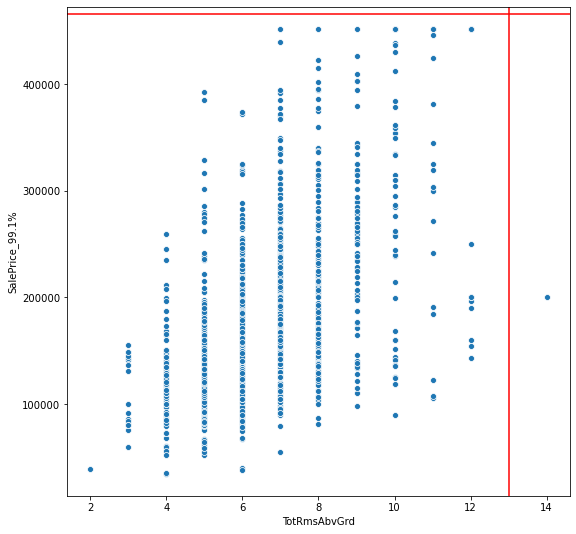

In [78]:
#SalePrice_91% graph with TotRmsAbvGrd
#horizontal line is the value of Upper Outer Fence SalePrice_91%
#vertical line is Upper Outer Fence TotRmsAbvGrd
# the dataframe used is dftr_win
plt.figure(figsize=(9,9))
sns.scatterplot(x= dftr_win['TotRmsAbvGrd'] , y= dftr_win['SalePrice_99.1%'] ,
                sizes = (10,200))
plt.axvline(x=13, color='r')
plt.axhline(y=466075.0, color='r')
plt.show()

In [79]:
# Count outliers
dftr_win[dftr_win['TotRmsAbvGrd']>=13][['GrLivArea','SalePrice_99.1%']]

GrLivArea  SalePrice_99.1%
635       3395           200000

#### Step 2: chossing the right quantile

In [80]:
#Explore different quantiles at the upper end
print('99.1% quantile:   ', dftr_win['TotRmsAbvGrd'].quantile(0.991))       
print('99.2% quantile:   ', dftr_win['TotRmsAbvGrd'].quantile(0.992))       
print('99.3% quantile:   ', dftr_win['TotRmsAbvGrd'].quantile(0.993))       
print('99.4% quantile:   ', dftr_win['TotRmsAbvGrd'].quantile(0.994))       
print('99.5% quantile: ', dftr_win['TotRmsAbvGrd'].quantile(0.995))
print('99.6% quantile:   ', dftr_win['TotRmsAbvGrd'].quantile(0.996))       
print('99.7% quantile: ', dftr_win['TotRmsAbvGrd'].quantile(0.997))      
print('99.8% quantile:   ', dftr_win['TotRmsAbvGrd'].quantile(0.998))       
print('99.9% quantile: ', dftr_win['TotRmsAbvGrd'].quantile(0.999))      

99.1% quantile:    11.0
99.2% quantile:    11.327999999999975
99.3% quantile:    12.0
99.4% quantile:    12.0
99.5% quantile:  12.0
99.6% quantile:    12.0
99.7% quantile:  12.0
99.8% quantile:    12.0
99.9% quantile:  12.0


- The way to choose the right quantile is to choose a quantile value that is close to <b>lower or upper fence.</b> According to the location of the outliers
- From the data selected quantile at 99.2% and quantile 99.3%
- From the data also obtained the value of k is 100% - quantile

#### Step 3: menghitung untuk memilih quantile 

In [81]:
# see the describe of the recommended quantile
# observe 99.2% and 99.3% quantile values

#Winsorize on right-tail
dftr_win['TotRmsAbvGrd_99.2%'] = winsorize(dftr_win['TotRmsAbvGrd'], limits=(0, 0.008)) # k bernilai 3%
dftr_win['TotRmsAbvGrd_99.3%'] = winsorize(dftr_win['TotRmsAbvGrd'], limits=(0, 0.007)) # k bernilai 2%

dftr_win[['TotRmsAbvGrd','TotRmsAbvGrd_99.2%','TotRmsAbvGrd_99.3%']].describe()

TotRmsAbvGrd  TotRmsAbvGrd_99.2%  TotRmsAbvGrd_99.3%
count   1460.000000         1460.000000         1460.000000
mean       6.517808            6.516438            6.516438
std        1.625393            1.619917            1.619917
min        2.000000            2.000000            2.000000
25%        5.000000            5.000000            5.000000
50%        6.000000            6.000000            6.000000
75%        7.000000            7.000000            7.000000
max       14.000000           12.000000           12.000000

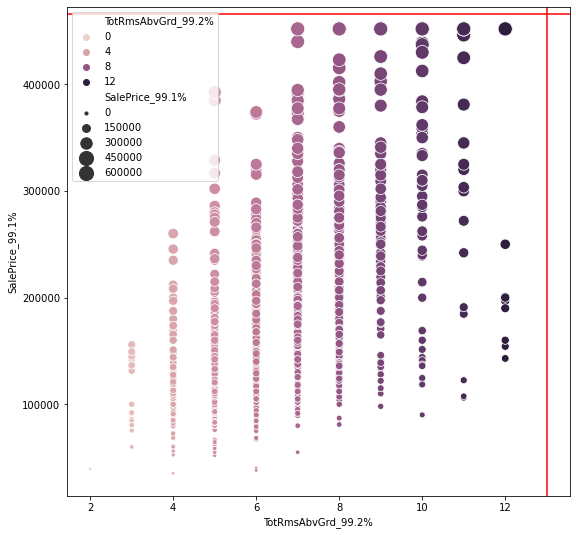

In [82]:
# Visualization of data after replacing ouliers with quantile=99.2% of calculation
plt.figure(figsize=(9,9))
sns.scatterplot(x= dftr_win['TotRmsAbvGrd_99.2%'] , y= dftr_win['SalePrice_99.1%'] ,
                hue=dftr_win['TotRmsAbvGrd_99.2%'], size=dftr_win['SalePrice_99.1%'], 
                sizes = (10,200))
sns.color_palette("tab10")
plt.axvline(x=13, color='r')
plt.axhline(y=466075.0, color='r')
plt.show()

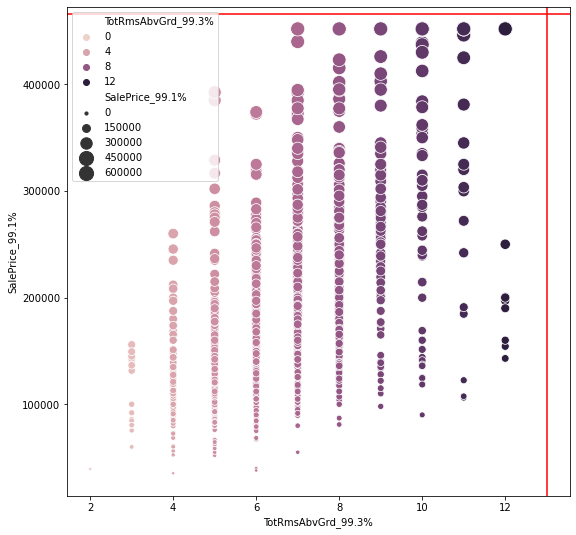

In [83]:
# Data visualization after replacing ouliers with quantile=99.3% of calculation
plt.figure(figsize=(9,9))
sns.scatterplot(x= dftr_win['TotRmsAbvGrd_99.3%'] , y= dftr_win['SalePrice_99.1%'] ,
                hue=dftr_win['TotRmsAbvGrd_99.3%'], size=dftr_win['SalePrice_99.1%'], 
                sizes = (10,200))
sns.color_palette("tab10")
plt.axvline(x=13, color='r')
plt.axhline(y=466075.0, color='r')
plt.show()

<code>Note: The selected quantile is 99.2% because, in that quantile there are no outliers<code>

#### Step 4: Memilih quantile

In [84]:
#Quantile selected in the range of 99.2%
#Data that has been treated with outliers is entered in the DataFrame dftr_win
#Removed TotRmsAbvGrd_99.3% column on dftr_win
dftr_win.drop('TotRmsAbvGrd_99.3%', axis=1, inplace=True)

# Reset index due to deleted data
dftr_win.reset_index(drop=True, inplace=True)

In [85]:
# Visualization with scatter plot after winorization
Q1 = dftr_win['TotRmsAbvGrd_99.2%'].quantile(0.25)
Q3 = dftr_win['TotRmsAbvGrd_99.2%'].quantile(0.75)
IQR = Q3 - Q1
print("IQR: ", IQR)
outer_fence_ue = Q3 + 3 * IQR
outer_fence_le = Q1 - 3 * IQR
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

IQR:  2.0
Lower end outer fence:  -1.0
Upper end outer fence:  13.0


In [86]:
# count outliers
dftr_win[dftr_win['TotRmsAbvGrd_99.2%']>=13]['SalePrice'].count()

0

Notes:
    - the TotRmsAbvGrd column no longer has outliers
    - treatment of TotRmsAbvGrd column outliers using the winorization method
    - TotRmsAbvGrd column is no longer valid, replaced with TotRmsAbvGrd_99.2% column

# Column GarageCars

<b>Step 1: Checking Outliers

In [87]:
#Outer fences of the variable GarageCars
def fences(df, variable_name):    
    q1 = dftr_win[variable_name].quantile(0.25)
    q3 = dftr_win[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue

outer_fence_le, outer_fence_ue = fences(dftr_win, 'GarageCars')
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

Lower end outer fence:  -2.0
Upper end outer fence:  5.0


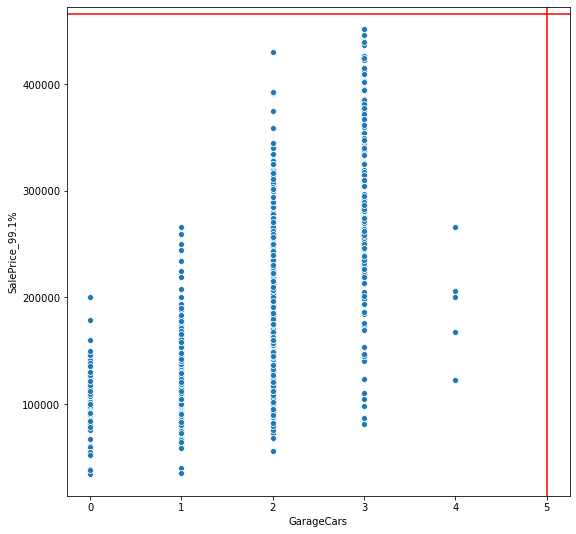

In [88]:
#SalePrice_91% graph with GarageCars
#horizontal line is the value of Upper Outer Fence SalePrice_91%
#vertical line is GarageCars Upper Outer Fence
# the dataframe used is dftr_win
plt.figure(figsize=(9,9))
sns.scatterplot(x= dftr_win['GarageCars'] , y= dftr_win['SalePrice_99.1%'] ,
                sizes = (10,200))
plt.axvline(x=5, color='r')
plt.axhline(y=466075.0, color='r')
plt.show()

In [89]:
# count outliers
dftr_win[dftr_win['GarageCars']>=5][['GarageCars','SalePrice_99.1%']].count()

GarageCars         0
SalePrice_99.1%    0
dtype: int64

Notes:
    - FullBath column no longer has outliers

# GarageArea

<b>Step 1: Checking Outliers

In [90]:
#Outer fences of the variable YearBuilt
def fences(df, variable_name):    
    q1 = dftr_win[variable_name].quantile(0.25)
    q3 = dftr_win[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue

outer_fence_le, outer_fence_ue = fences(dftr_win, 'GarageArea')
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

Lower end outer fence:  -390.0
Upper end outer fence:  1300.5


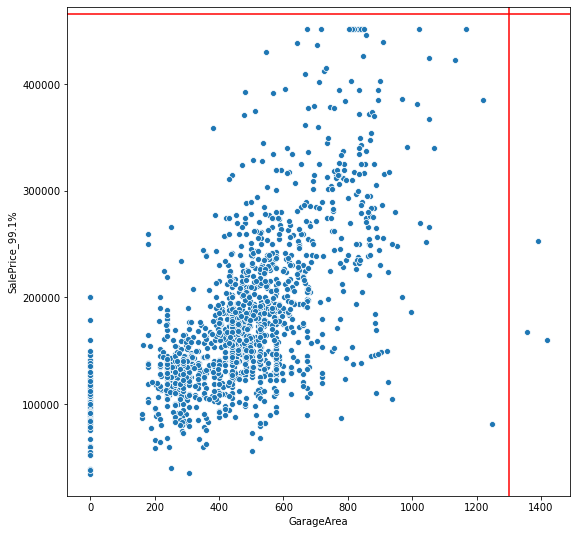

In [91]:
#SalePrice_91% graph with GarageArea
#horizontal line is the value of Upper Outer Fence SalePrice_91%
#vertical line is the Upper Outer Fence GarageArea
# the dataframe used is dftr_win
plt.figure(figsize=(9,9))
sns.scatterplot(x= dftr_win['GarageArea'] , y= dftr_win['SalePrice_99.1%'] ,
                sizes = (10,200))
plt.axvline(x=1301, color='r')
plt.axhline(y=466075.0, color='r')
plt.show()

In [92]:
# count outliers
dftr_win[dftr_win['GarageArea']>=1301][['GarageArea','SalePrice_99.1%']]

GarageArea  SalePrice_99.1%
581         1390           253293
1190        1356           168000
1298        1418           160000

#### Step 2: chossing the right quantile

In [93]:
#Explore different quantiles at the upper end
print('99.1% quantile:   ', dftr_win['GarageArea'].quantile(0.991))       
print('99.2% quantile:   ', dftr_win['GarageArea'].quantile(0.992))       
print('99.3% quantile:   ', dftr_win['GarageArea'].quantile(0.993))       
print('99.4% quantile:   ', dftr_win['GarageArea'].quantile(0.994))       
print('99.5% quantile: ', dftr_win['GarageArea'].quantile(0.995))
print('99.6% quantile:   ', dftr_win['GarageArea'].quantile(0.996))       
print('99.7% quantile:   ', dftr_win['GarageArea'].quantile(0.997))       
print('99.8% quantile: ', dftr_win['GarageArea'].quantile(0.9988))   
print('99.9% quantile: ', dftr_win['GarageArea'].quantile(0.999))      

99.1% quantile:    1019.2139999999995
99.2% quantile:    1030.9039999999995
99.3% quantile:    1050.0830000000003
99.4% quantile:    1052.246
99.5% quantile:  1064.2799999999988
99.6% quantile:    1139.2479999999996
99.7% quantile:    1199.6420000000026
99.8% quantile:  1364.472799999999
99.9% quantile:  1374.3940000000057


- The way to choose the right quantile is to choose a quantile value that is close to <b>lower or upper fence.</b> According to the location of the outliers
- From the data selected quantile at 99.7% and quantile 99.8%
- From the data also obtained the value of k is 100% - quantile

#### Step 3: menghitung untuk memilih quantile 

In [94]:
# see the describe of the recommended quantile
# observe 99.7% quantile and 99.8% quantile values

#Winsorize on right-tail
dftr_win['GarageArea_99.7%'] = winsorize(dftr_win['GarageArea'], limits=(0, 0.003)) # k bernilai 0.3%
dftr_win['GarageArea_99.8%'] = winsorize(dftr_win['GarageArea'], limits=(0, 0.002)) # k bernilai 0.2%

dftr_win[['GarageArea','GarageArea_99.7%','GarageArea_99.8%']].describe()

GarageArea  GarageArea_99.7%  GarageArea_99.8%
count  1460.000000       1460.000000       1460.000000
mean    472.980137        472.615753        472.914384
std     213.804841        212.385752        213.524884
min       0.000000          0.000000          0.000000
25%     334.500000        334.500000        334.500000
50%     480.000000        480.000000        480.000000
75%     576.000000        576.000000        576.000000
max    1418.000000       1220.000000       1356.000000

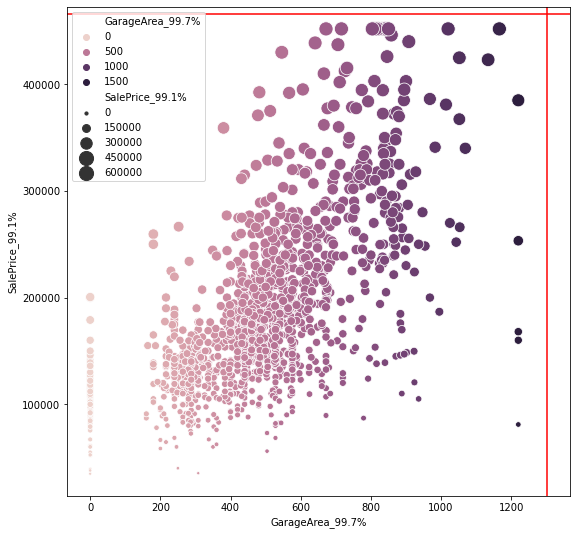

In [95]:
# Visualization of data after replacing ouliers with quantile=99.7% of calculation
plt.figure(figsize=(9,9))
sns.scatterplot(x= dftr_win['GarageArea_99.7%'] , y= dftr_win['SalePrice_99.1%'] ,
                hue=dftr_win['GarageArea_99.7%'], size=dftr_win['SalePrice_99.1%'], 
                sizes = (10,200))
sns.color_palette("tab10")
plt.axvline(x=1301, color='r')
plt.axhline(y=466075.0, color='r')
plt.show()

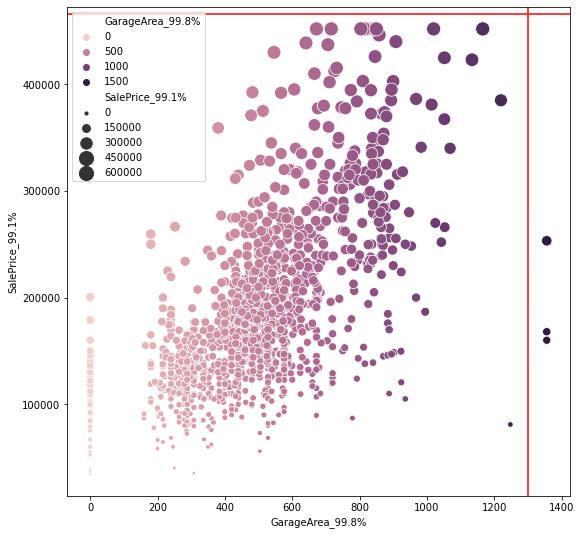

In [96]:
# Visualization of data after replacing ouliers with quantile=99.8% of calculation
plt.figure(figsize=(9,9))
sns.scatterplot(x= dftr_win['GarageArea_99.8%'] , y= dftr_win['SalePrice_99.1%'] ,
                hue=dftr_win['GarageArea_99.8%'], size=dftr_win['SalePrice_99.1%'], 
                sizes = (10,200))
sns.color_palette("tab10")
plt.axvline(x=1301, color='r')
plt.axhline(y=466075.0, color='r')
plt.show()

<code>Note: The selected quantile is 99.7% because, in that quantile there are no outliers<code>

#### Step 4: Memilih quantile

In [97]:
#Quantile selected in the range of 99.7%
#Data that has been treated with outliers is entered in the DataFrame dftr_win
#Removed GarageArea_99.8% column on dftr_win
dftr_win.drop('GarageArea_99.8%', axis=1, inplace=True)

# Me-reset indeks karena ada data yang terhapus
dftr_win.reset_index(drop=True, inplace=True)

In [98]:
# Visualization with scatter plot after winorization
Q1 = dftr_win['GarageArea_99.7%'].quantile(0.25)
Q3 = dftr_win['GarageArea_99.7%'].quantile(0.75)
IQR = Q3 - Q1
print("IQR: ", IQR)
outer_fence_ue = Q3 + 3 * IQR
outer_fence_le = Q1 - 3 * IQR
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

IQR:  241.5
Lower end outer fence:  -390.0
Upper end outer fence:  1300.5


In [99]:
# count outliers
dftr_win[dftr_win['GarageArea_99.7%']>=1301]['SalePrice'].count()

0

Notes:
    - GarageArea column no longer has outliers
    - treatment of GarageArea column outliers using the winorization method
    - GarageArea column is no longer valid, replaced with GarageArea_99.7% column

* [Back](#back)

In [100]:
dftr_win.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   OverallQual         1460 non-null   int64
 1   YearBuilt           1460 non-null   int64
 2   YearRemodAdd        1460 non-null   int64
 3   TotalBsmtSF         1460 non-null   int64
 4   1stFlrSF            1460 non-null   int64
 5   GrLivArea           1460 non-null   int64
 6   FullBath            1460 non-null   int64
 7   TotRmsAbvGrd        1460 non-null   int64
 8   GarageCars          1460 non-null   int64
 9   GarageArea          1460 non-null   int64
 10  SalePrice           1460 non-null   int64
 11  SalePrice_99.1%     1460 non-null   int64
 12  TotalBsmtSF_99.6%   1460 non-null   int64
 13  1stFlrSF_99.7%      1460 non-null   int64
 14  GrLivArea_99.7%     1460 non-null   int64
 15  TotRmsAbvGrd_99.2%  1460 non-null   int64
 16  GarageArea_99.7%    1460 non-null   int64


<a id="exp"></a>
# Exploratory Data Analysist

### See the correlation between the features column and the target column

In [101]:
dftr_win.corr()['SalePrice_99.1%']

OverallQual           0.808263
YearBuilt             0.544401
YearRemodAdd          0.529302
TotalBsmtSF           0.617132
1stFlrSF              0.609221
GrLivArea             0.703453
FullBath              0.567636
TotRmsAbvGrd          0.535471
GarageCars            0.659564
GarageArea            0.641025
SalePrice             0.985664
SalePrice_99.1%       1.000000
TotalBsmtSF_99.6%     0.648296
1stFlrSF_99.7%        0.627901
GrLivArea_99.7%       0.720195
TotRmsAbvGrd_99.2%    0.537053
GarageArea_99.7%      0.645129
Name: SalePrice_99.1%, dtype: float64

In [102]:
# retrieve the column that has a correlation with the SalePrice column > 0.5
dftr_corr=dftr_win[['OverallQual','GrLivArea_99.7%','GarageCars','TotalBsmtSF_99.6%','GarageArea_99.7%','1stFlrSF_99.7%','FullBath','YearBuilt','TotRmsAbvGrd_99.2%','YearRemodAdd','SalePrice_99.1%']]

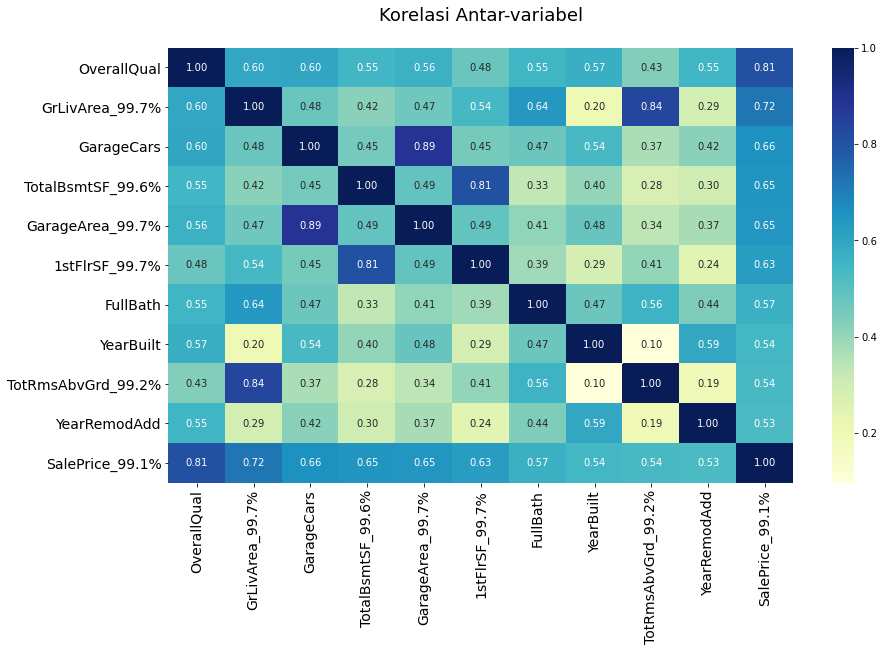

In [103]:
# See correlation between columns with heatmap

plt.figure(figsize=(14,8))    # Set the size of the figure

# Create a heatmap to see the correlation of numeric columns
sns.heatmap(dftr_corr.corr(), annot=True, fmt='.2f', cmap='YlGnBu')

plt.title('Korelasi Antar-variabel\n', size=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

Notes:
- The dataframe used for further analysis is <b>dftr_corr</b> ie data from <b>dftr_win</b> which has been sought for the highest correlation with the target column, namely the SalePrice_99.1% column
- The value of the specified correlation is 0.5 and above

### Analysist of Dataset

In [104]:
dftr_corr.head(3)

OverallQual  GrLivArea_99.7%  GarageCars  TotalBsmtSF_99.6%  \
0            7             1710           2                856   
1            6             1262           2               1262   
2            7             1786           2                920   

   GarageArea_99.7%  1stFlrSF_99.7%  FullBath  YearBuilt  TotRmsAbvGrd_99.2%  \
0               548             856         2       2003                   8   
1               460            1262         2       1976                   6   
2               608             920         2       2001                   6   

   YearRemodAdd  SalePrice_99.1%  
0          2003           208500  
1          1976           181500  
2          2002           223500

In [105]:
dftr_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   OverallQual         1460 non-null   int64
 1   GrLivArea_99.7%     1460 non-null   int64
 2   GarageCars          1460 non-null   int64
 3   TotalBsmtSF_99.6%   1460 non-null   int64
 4   GarageArea_99.7%    1460 non-null   int64
 5   1stFlrSF_99.7%      1460 non-null   int64
 6   FullBath            1460 non-null   int64
 7   YearBuilt           1460 non-null   int64
 8   TotRmsAbvGrd_99.2%  1460 non-null   int64
 9   YearRemodAdd        1460 non-null   int64
 10  SalePrice_99.1%     1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [106]:
dftr_corr.describe()

OverallQual  GrLivArea_99.7%   GarageCars  TotalBsmtSF_99.6%  \
count  1460.000000      1460.000000  1460.000000        1460.000000   
mean      6.099315      1512.311644     1.767123        1053.605479   
std       1.382997       508.372601     0.747315         413.929433   
min       1.000000       334.000000     0.000000           0.000000   
25%       5.000000      1129.500000     1.000000         795.750000   
50%       6.000000      1464.000000     2.000000         991.500000   
75%       7.000000      1776.750000     2.000000        1298.250000   
max      10.000000      3627.000000     4.000000        2633.000000   

       GarageArea_99.7%  1stFlrSF_99.7%     FullBath    YearBuilt  \
count       1460.000000     1460.000000  1460.000000  1460.000000   
mean         472.615753     1160.281507     1.565068  1971.267808   
std          212.385752      373.057467     0.550916    30.202904   
min            0.000000      334.000000     0.000000  1872.000000   
25%          334.500000      882.000000     1.000000  1954.000000   
50%          480.000000     1087.000000     2.000000  1973.000000   
75%          576.000000     1391.250000     2.000000  2000.000000   
max         1220.000000     2633.000000     3.000000  2010.000000   

       TotRmsAbvGrd_99.2%  YearRemodAdd  SalePrice_99.1%  
count         1460.000000   1460.000000      1460.000000  
mean             6.516438   1984.865753    179902.594521  
std              1.619917     20.645407     74585.804195  
min              2.000000   1950.000000     34900.000000  
25%              5.000000   1967.000000    129975.000000  
50%              6.000000   1994.000000    163000.000000  
75%              7.000000   2004.000000    214000.000000  
max             12.000000   2010.000000    451950.000000

### Analyze feature column with target column

<b>df_target and df_features</b>

In [107]:
# df_target
df_target=dftr_corr['SalePrice_99.1%']

In [108]:
# df_fiture
df_features = dftr_corr.drop('SalePrice_99.1%', axis=1)

<b> Visualization df_features and df_target</b>

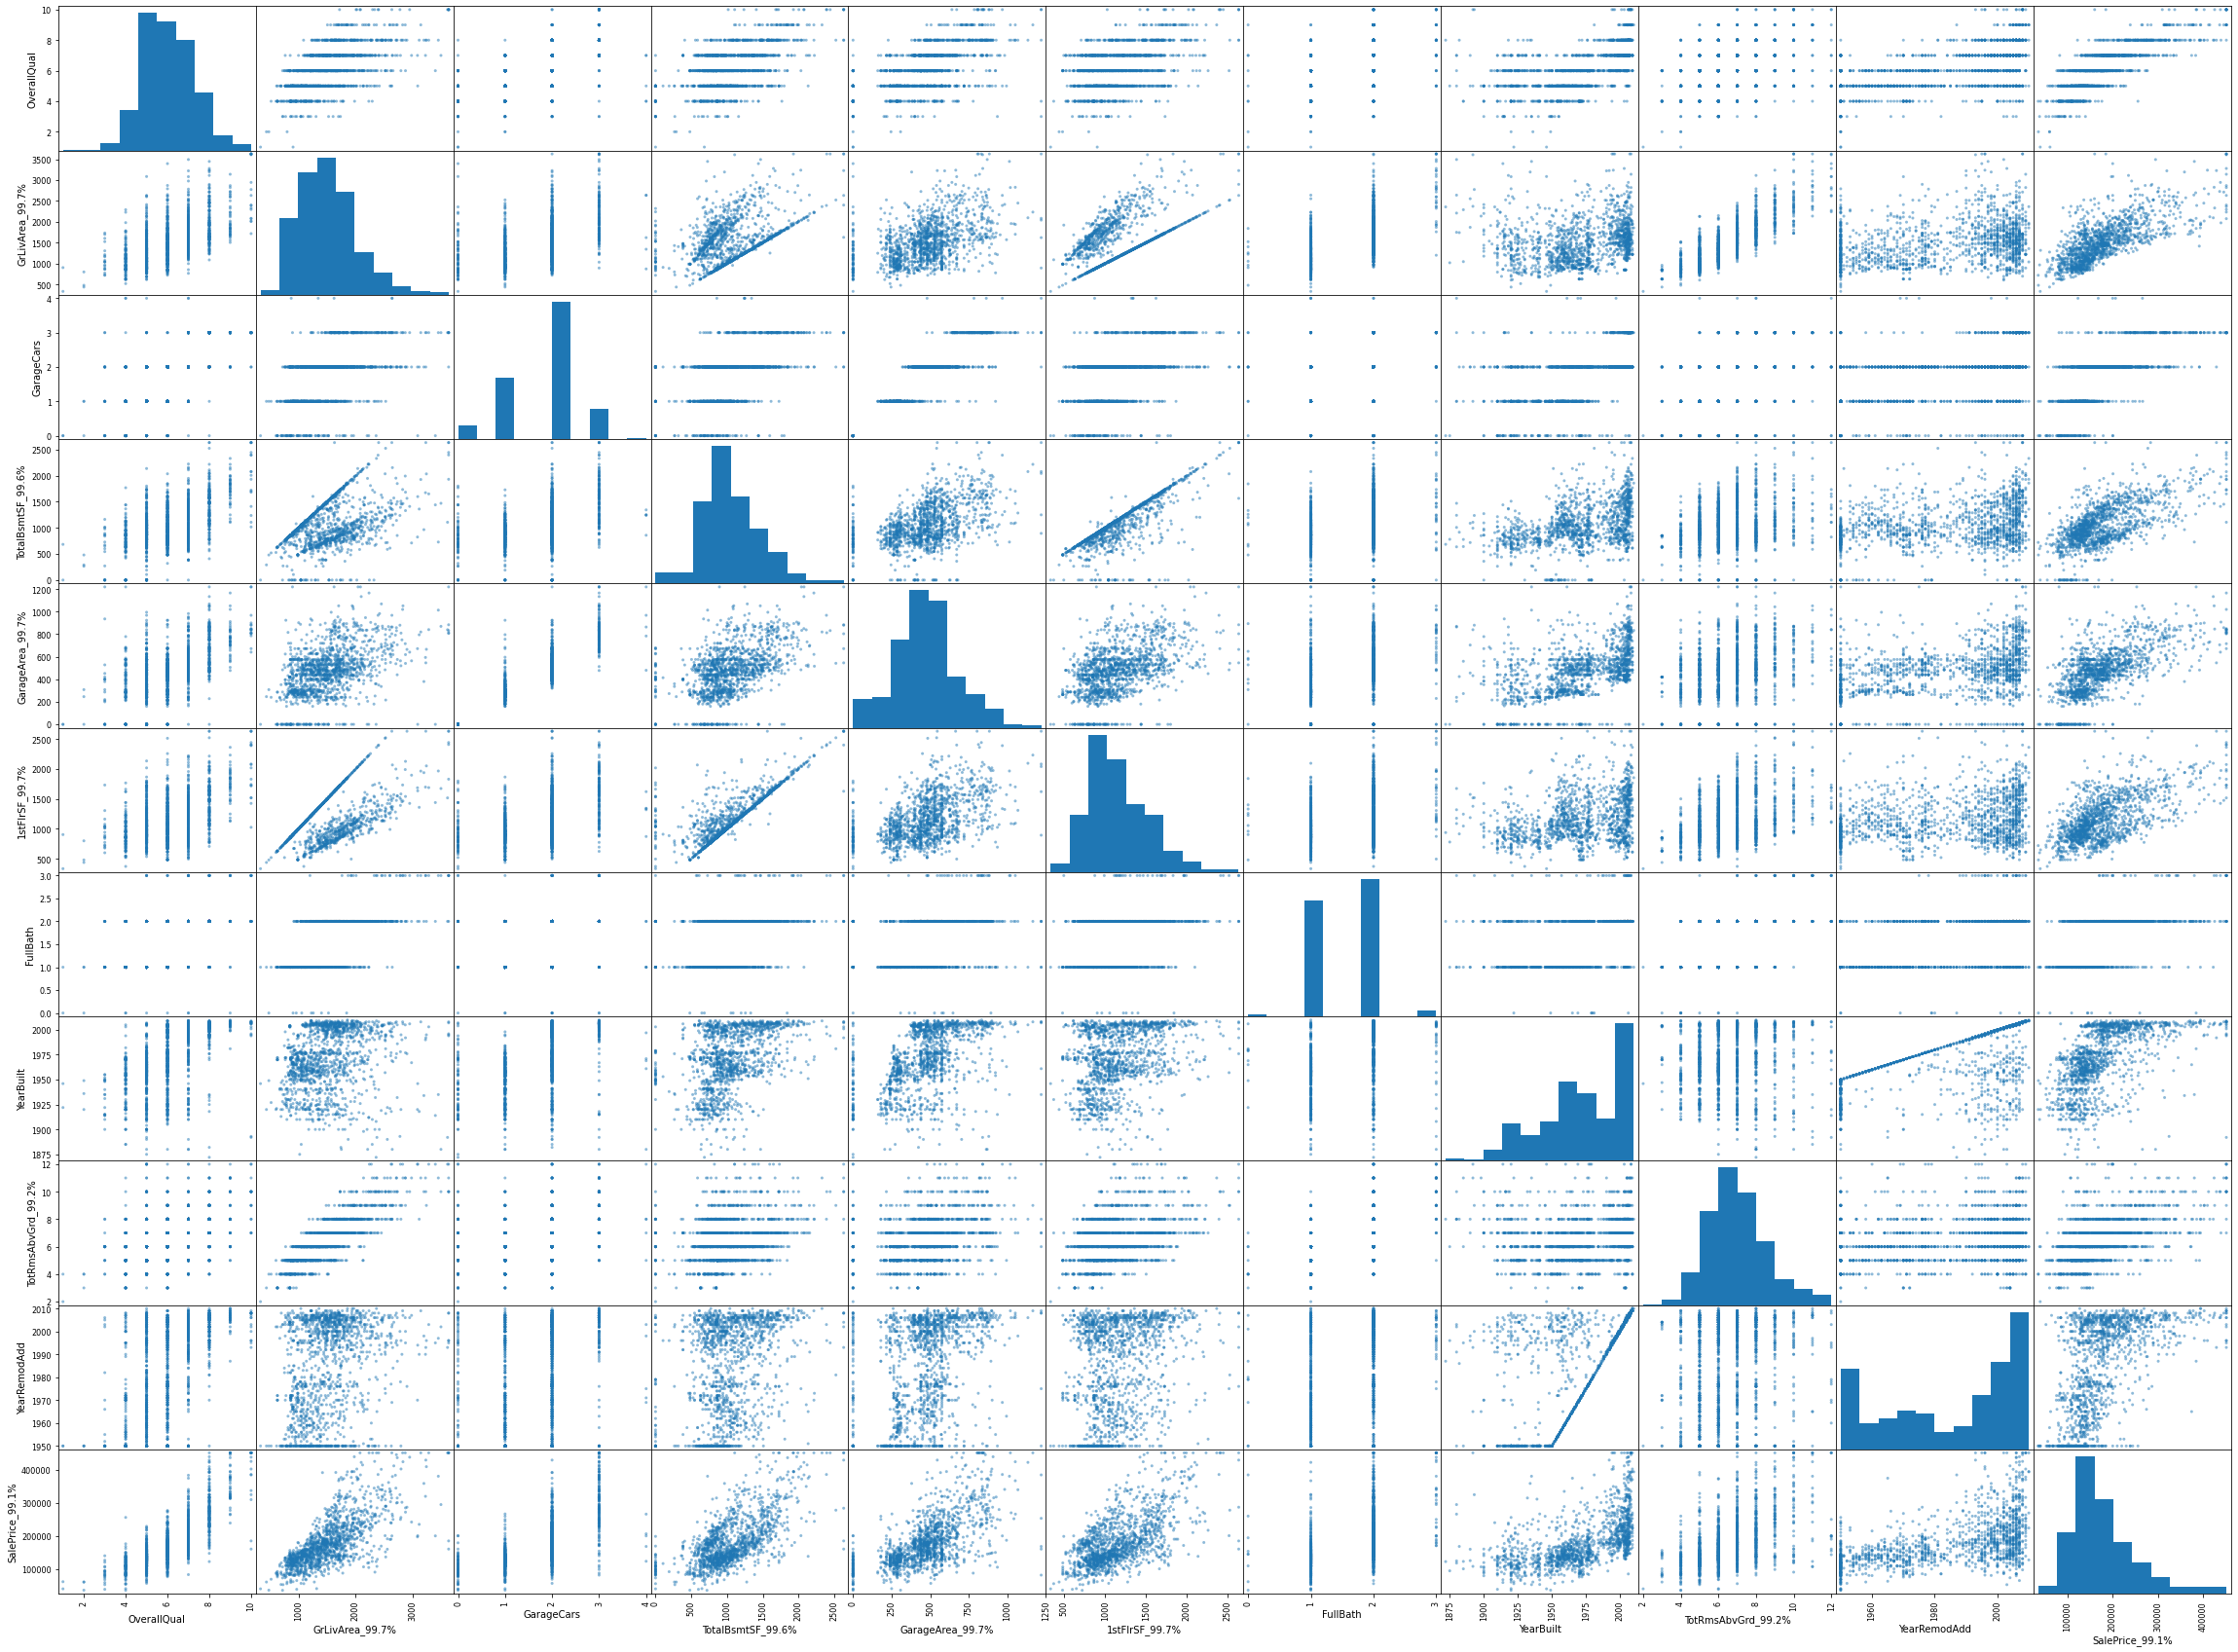

In [109]:
# Make a scatter matrix of numeric columns
pd.plotting.scatter_matrix(dftr_corr, 
                           # Make figure large to show details
                           figsize = [40,30], 
                           # Lower point opacity to show overlap
                           alpha = 0.5)

plt.show()

Notes:
- From the graph above, an insight can be drawn that most of the correlations between columns form a linear relationship.
- Columns that are not linear are YearBuilt, YearRemodAdd

### Analysis of Year and SalePrice

In [110]:
Year=pd.DataFrame([dftr_corr['YearBuilt'],
                   dftr_corr['YearRemodAdd'],dftr_corr['SalePrice_99.1%']])
Year=Year.T

In [111]:
Year.corr()['SalePrice_99.1%']

YearBuilt          0.544401
YearRemodAdd       0.529302
SalePrice_99.1%    1.000000
Name: SalePrice_99.1%, dtype: float64

In [112]:
# Added a new column with assign
# Assume the current year is the maximum year from the YearBuilt kolom column
Year = Year.assign(Age_house = Year['YearBuilt'].max() - Year['YearBuilt'])
Year

YearBuilt  YearRemodAdd  SalePrice_99.1%  Age_house
0          2003          2003           208500          7
1          1976          1976           181500         34
2          2001          2002           223500          9
3          1915          1970           140000         95
4          2000          2000           250000         10
...         ...           ...              ...        ...
1455       1999          2000           175000         11
1456       1978          1988           210000         32
1457       1941          2006           266500         69
1458       1950          1996           142125         60
1459       1965          1965           147500         45

[1460 rows x 4 columns]

In [113]:
Year.corr()['SalePrice_99.1%']

YearBuilt          0.544401
YearRemodAdd       0.529302
SalePrice_99.1%    1.000000
Age_house         -0.544401
Name: SalePrice_99.1%, dtype: float64

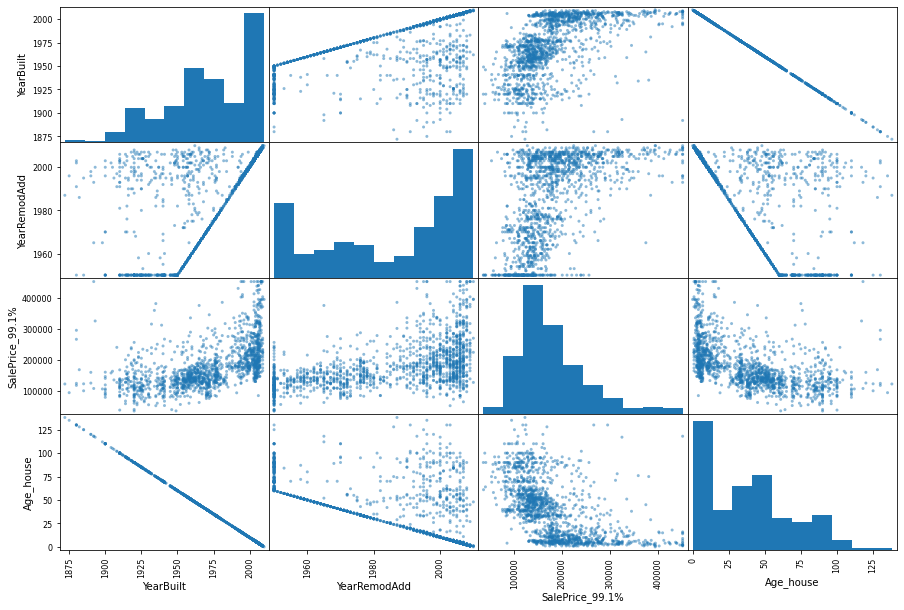

In [114]:
# Make a scatter matrix of numeric columns
pd.plotting.scatter_matrix(Year, 
                           # Make figure large to show details
                           figsize = [15,10], 
                           # Lower point opacity to show overlap
                           alpha = 0.5)

plt.show()

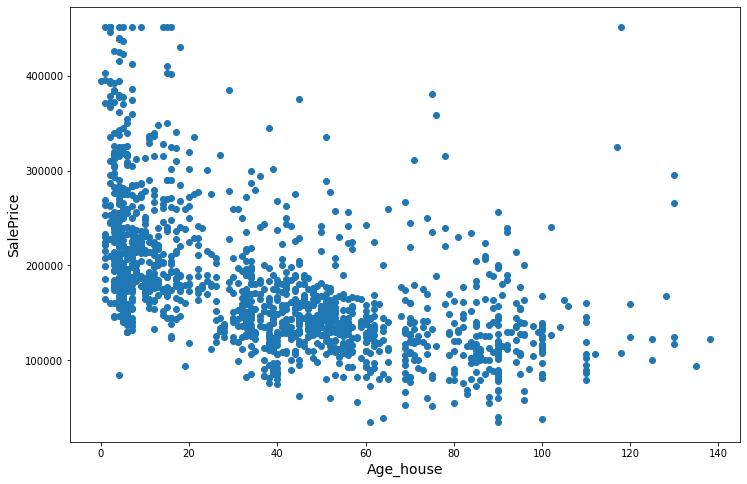

In [115]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(Year['Age_house'], Year['SalePrice_99.1%'])

ax.set_xlabel('Age_house', size=14)
ax.set_ylabel('SalePrice', size=14)

plt.show()

Notes:
- The younger the age of the house, the relatively expensive price and vice versa

In [116]:
# Added a new column with assign
# Assume the current year is the maximum year from the YearBuilt kolom column
Year = Year.assign(Original_Building = Year['YearRemodAdd'] - Year['YearBuilt'])
Year

YearBuilt  YearRemodAdd  SalePrice_99.1%  Age_house  Original_Building
0          2003          2003           208500          7                  0
1          1976          1976           181500         34                  0
2          2001          2002           223500          9                  1
3          1915          1970           140000         95                 55
4          2000          2000           250000         10                  0
...         ...           ...              ...        ...                ...
1455       1999          2000           175000         11                  1
1456       1978          1988           210000         32                 10
1457       1941          2006           266500         69                 65
1458       1950          1996           142125         60                 46
1459       1965          1965           147500         45                  0

[1460 rows x 5 columns]

In [117]:
Year.corr()['SalePrice_99.1%']

YearBuilt            0.544401
YearRemodAdd         0.529302
SalePrice_99.1%      1.000000
Age_house           -0.544401
Original_Building   -0.225312
Name: SalePrice_99.1%, dtype: float64

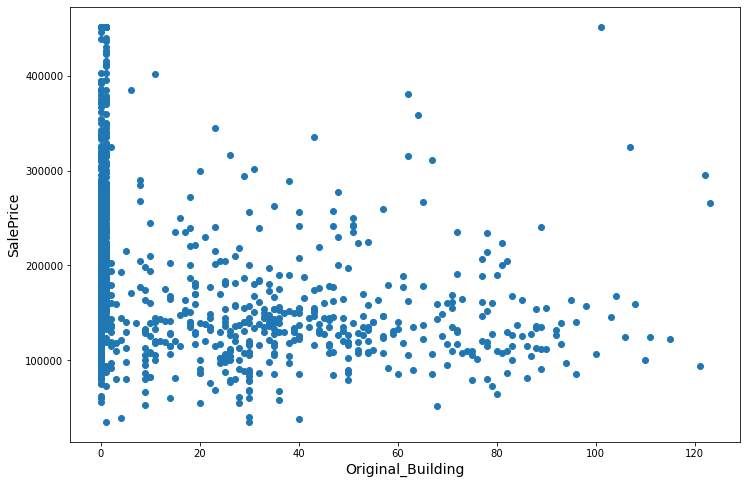

In [118]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(Year['Original_Building'], Year['SalePrice_99.1%'])

ax.set_xlabel('Original_Building', size=14)
ax.set_ylabel('SalePrice', size=14)

plt.show()

Notes:
    - The original building without being renovated is relatively more expensive and vice versa

### Analysis of Area with SalePrice

In [119]:
area=dftr_corr[['GrLivArea_99.7%','TotalBsmtSF_99.6%',
                'GarageArea_99.7%','1stFlrSF_99.7%','SalePrice_99.1%']]

In [120]:
area.corr()['SalePrice_99.1%']

GrLivArea_99.7%      0.720195
TotalBsmtSF_99.6%    0.648296
GarageArea_99.7%     0.645129
1stFlrSF_99.7%       0.627901
SalePrice_99.1%      1.000000
Name: SalePrice_99.1%, dtype: float64

Note:
1. GrLivArea: Above grade (ground) living area square feet
2. TotalBsmtSF: Total square feet of basement area
3. GarageArea: Size of garage in square feet
4. 1stFlrSF: First Floor square feet

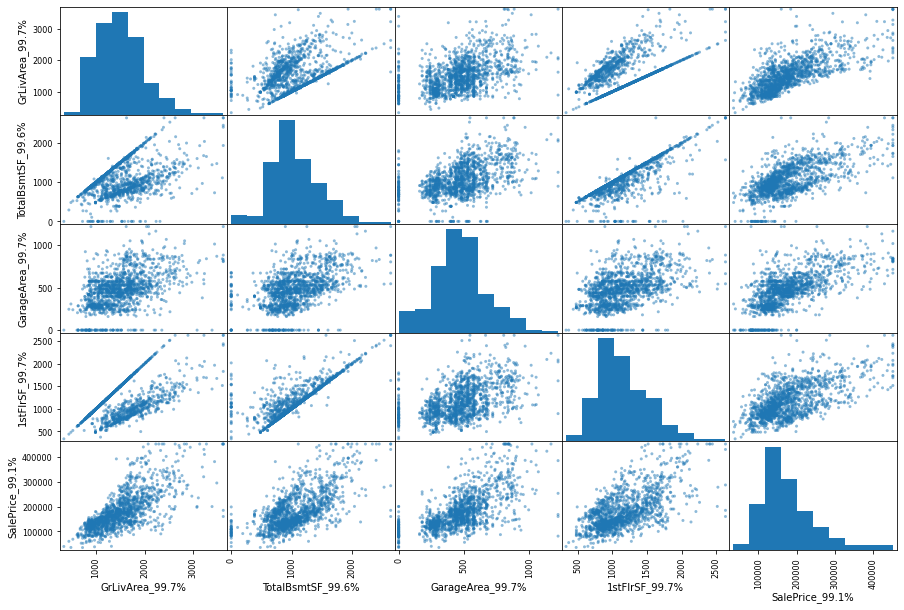

In [121]:
# Make a scatter matrix of numeric columns
pd.plotting.scatter_matrix(area, 
                           # Make figure large to show details
                           figsize = [15,10], 
                           # Lower point opacity to show overlap
                           alpha = 0.5)

plt.show()

Notes:
    - Normal data distribution
    - The correlation between dataframe area and SalePrice_99.1% linear

### Deskriptive Statistik

In [122]:
dftr_corr.describe()

OverallQual  GrLivArea_99.7%   GarageCars  TotalBsmtSF_99.6%  \
count  1460.000000      1460.000000  1460.000000        1460.000000   
mean      6.099315      1512.311644     1.767123        1053.605479   
std       1.382997       508.372601     0.747315         413.929433   
min       1.000000       334.000000     0.000000           0.000000   
25%       5.000000      1129.500000     1.000000         795.750000   
50%       6.000000      1464.000000     2.000000         991.500000   
75%       7.000000      1776.750000     2.000000        1298.250000   
max      10.000000      3627.000000     4.000000        2633.000000   

       GarageArea_99.7%  1stFlrSF_99.7%     FullBath    YearBuilt  \
count       1460.000000     1460.000000  1460.000000  1460.000000   
mean         472.615753     1160.281507     1.565068  1971.267808   
std          212.385752      373.057467     0.550916    30.202904   
min            0.000000      334.000000     0.000000  1872.000000   
25%          334.500000      882.000000     1.000000  1954.000000   
50%          480.000000     1087.000000     2.000000  1973.000000   
75%          576.000000     1391.250000     2.000000  2000.000000   
max         1220.000000     2633.000000     3.000000  2010.000000   

       TotRmsAbvGrd_99.2%  YearRemodAdd  SalePrice_99.1%  
count         1460.000000   1460.000000      1460.000000  
mean             6.516438   1984.865753    179902.594521  
std              1.619917     20.645407     74585.804195  
min              2.000000   1950.000000     34900.000000  
25%              5.000000   1967.000000    129975.000000  
50%              6.000000   1994.000000    163000.000000  
75%              7.000000   2004.000000    214000.000000  
max             12.000000   2010.000000    451950.000000

Notes:
    1. standard deviation, as an indicator of how far the statistical data deviate. The lower the value is closer to the average
    . Otherwise, it means the wider the range of data variations. It can be interpreted that the standard deviation is a large difference
    from the sample value to the average
    2. That is, the average value of the dataset.

* [Back](#back)

<a id="split"></a>
# Split Dataset

Split the data into training data and test data with train test split.

In [123]:
from sklearn.model_selection import train_test_split

# Split data with train test split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=4)

In [124]:
# Display X_train and X_test data

print('Train set:', X_train.shape,  y_train.shape)
print(X_train.head())
print('\n')
print('Test set:', X_test.shape,  y_test.shape)
print(X_test.head())

Train set: (1168, 10) (1168,)
     OverallQual  GrLivArea_99.7%  GarageCars  TotalBsmtSF_99.6%  \
666            6             2380           2               1021   
226            7             2520           3               1203   
155            6             1096           0                572   
231            8             2794           3               1462   
901            5             1306           1                992   

     GarageArea_99.7%  1stFlrSF_99.7%  FullBath  YearBuilt  \
666               596            1465         2       1965   
226               721            1214         2       1995   
155                 0             572         1       1924   
231               810            1490         2       1995   
901               756            1306         1       1957   

     TotRmsAbvGrd_99.2%  YearRemodAdd  
666                   7          1979  
226                   9          1995  
155                   5          1950  
231                   9     

* [Back](#back)

<a id="modeling"></a>
# Built Machine Learning

### Multiple Linear Regression

In [125]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

acc_multi_linear = round(lr_model.score(X_train, y_train) * 100, 2)

### Evaluasi

In [126]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Evaluation
R2_score_m= r2_score(y_test, y_pred)
MAE_m = mean_absolute_error(y_test, y_pred)
RMSE_m = np.sqrt(mean_squared_error(y_test, y_pred))

## Ridge

In [127]:
from sklearn.linear_model import Ridge
ridge_model= Ridge(alpha=0.1, normalize=True)
ridge_model.fit(X_train, y_train)
y_pred_ridge= ridge_model.predict(X_test)
acc_ridge = round(ridge_model.score(X_train, y_train) * 100, 2)

In [128]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Evaluation
R2_score_r= r2_score(y_test, y_pred_ridge)
MAE_r = mean_absolute_error(y_test, y_pred_ridge)
RMSE_r = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

## Lasso

In [129]:
from sklearn.linear_model import Lasso
lasso_model= Lasso(alpha=0.8, normalize=True)
lasso_model.fit(X_train, y_train)
y_pred_lasso= lasso_model.predict(X_test)
acc_lasso = round(lasso_model.score(X_train, y_train) * 100, 2)

In [130]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Evaluation
R2_score_l= r2_score(y_test, y_pred_lasso)
MAE_l = mean_absolute_error(y_test, y_pred_lasso)
RMSE_l = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

## Elastic Net

In [131]:
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
elastic_model.fit(X_train, y_train)
y_pred_elastic= elastic_model.predict(X_test)
acc_elastic = round(elastic_model.score(X_train, y_train) * 100, 2)

In [132]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Evaluation
R2_score_en= r2_score(y_test, y_pred_elastic)
MAE_en = mean_absolute_error(y_test, y_pred_elastic)
RMSE_en = np.sqrt(mean_squared_error(y_test, y_pred_elastic))

* [Back](#back)

<a id="best"></a>
# Best Model

In [133]:
results = pd.DataFrame({
                        'Model': ['Multiple Linear Regression','Ridge', 'Lasso',
                                  'ElasticNet'],
                        'Score': [acc_multi_linear, acc_ridge, acc_lasso, acc_elastic]
                        })
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

Model
Score                            
81.69  Multiple Linear Regression
81.69                       Lasso
81.40                       Ridge
80.87                  ElasticNet

* [Back](#back)

<a id="evaluation"></a>
# Evaluation Model

In [134]:
evaluation_linier_regression = pd.DataFrame({
                        'linear_regression': ['Multiple Linear Regression','Ridge', 'Lasso', 'ElasticNet'],
                        'R2_Score': [R2_score_m, R2_score_r, R2_score_l, R2_score_en],
                        'MAE_Score': [MAE_m, MAE_r, MAE_l, MAE_en],
                        'MSE_Score': [RMSE_m, RMSE_r, RMSE_l, RMSE_en],
                        'Score': [acc_multi_linear, acc_ridge, acc_lasso, acc_elastic]
                                })
evaluation_linier_regression_df = evaluation_linier_regression.sort_values(by='linear_regression', ascending=True)
evaluation_linier_regression_df = evaluation_linier_regression_df.set_index('linear_regression')
evaluation_linier_regression_df

R2_Score     MAE_Score     MSE_Score  Score
linear_regression                                                      
ElasticNet                  0.825290  21391.367023  30780.625423  80.87
Lasso                       0.832677  21364.038959  30122.871049  81.69
Multiple Linear Regression  0.832971  21350.720804  30096.398215  81.69
Ridge                       0.819996  21891.613996  31243.445115  81.40

Notes:
    1. R^2 is total variance that can be explained by the model
    2. MAE is the value of the absolute value of the error
    3. MSE to give an absolute value of how much the prediction deviates from the actual data, with a penalty that is greater than MAE

<code>Note: from the table above, it can be concluded that the recommended machine learning modeling is <b>Multiple Linear Regression</b></code>

* [Back](#back)